### data-period

```
SELECT scoreboard_entry_abstract.id, scoreboard_entry_basic.consultation_supervisor_id as supervisor, internship.id as internship, period.name as 'period', internship_assignment.student_id, consultation_date, scoreboard_entry_abstract.created_at as creation_date, scoreboard_entry_abstract.updated_at as edition_date, patient_age, patient_gender, consultation_supervision, skill_situation_family.code, tag.name 
FROM scoreboard_entry_basic

LEFT JOIN scoreboard_entry_abstract ON scoreboard_entry_basic.id = scoreboard_entry_abstract.id
LEFT JOIN skill_container_for_scoreboard ON scoreboard_entry_abstract.skill_container_id = skill_container_for_scoreboard.id 
LEFT JOIN skill_container_with_situation_family ON skill_container_for_scoreboard.id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN internship_assignment ON internship_assignment.id = scoreboard_entry_abstract.internship_assignment_id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id
LEFT JOIN internship_tag_for_internship ON internship_tag_for_internship.internship_id = internship.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN tag_internship ON tag_internship.id = internship_tag_for_internship.tag_for_internship_id
LEFT JOIN tag ON tag.id = tag_internship.id 

WHERE period.name = '20222' // A remplacer par le nom de la période. 
```

## Import des librairies

In [791]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import chi2_contingency

import seaborn as sns

## Import et pré-traitement des données

In [792]:
FS = ['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08', 'FS09', 'FS10', 'FS11']

data_part1 = pd.read_csv('data/data-20222.csv')
data_part2 = pd.read_csv('data/data-20231.csv')
data_part3 = pd.read_csv('data/data-20232.csv')
data_part4 = pd.read_csv('data/data-20241.csv')
data_part1['season'] = 'summer'
data_part2['season'] = 'winter'
data_part3['season'] = 'summer'
data_part4['season'] = 'winter'


data = pd.concat([data_part1, data_part2, data_part3, data_part4])

## Cleaning data ##
data = data.drop(data[data.name == 'Ambu'].index)
data = data.drop(data[data.name == 'Interchu'].index)

data = data.reset_index()

display(data)

,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02 00:00:00,2023-05-02 23:08:04,2023-05-02 23:08:04,26,1,1,FS11,SN1,summer
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02 00:00:00,2023-05-02 23:10:42,2023-05-02 23:10:42,27,2,1,FS08,SN1,summer
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02 00:00:00,2023-05-02 23:22:54,2023-05-02 23:22:54,26,2,1,FS02,SN1,summer
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02 00:00:00,2023-05-02 23:24:02,2023-05-02 23:24:02,50,1,1,FS01,SN1,summer
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02 00:00:00,2023-05-02 23:25:16,2023-05-02 23:25:16,60,2,1,FS01,SN1,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116184,35810,01961a63-7351-7421-9dd0-bed6ac35c47a,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-22 00:00:00,2025-04-09 13:50:47,2025-04-09 13:50:47,2,2,2,FS04,SN2,winter
116185,35811,01961a63-f759-76b1-bbae-2983d5bd8053,019386bb-6ad5-72f0-8085-d320e8c6a7ec,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2024-12-05 00:00:00,2025-04-09 13:51:21,2025-04-09 13:51:21,0,1,2,FS04,SN2,winter
116186,35812,01961a64-59e0-7736-af45-e0e1d95ac7c7,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-08 00:00:00,2025-04-09 13:51:46,2025-04-09 13:51:46,4,2,2,FS04,SN2,winter
116187,35813,01961a65-09e4-7119-bd33-593dca00fb38,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07 00:00:00,2025-04-09 13:52:31,2025-04-09 13:52:31,37,2,2,FS11,SN2,winter


In [793]:
## Re-codage du genre ##
# Homme = 1
# Femme = 2 
# Autre = 3 

data.loc[data['patient_gender'] == 1, 'patient_gender'] = 'homme'
data.loc[data['patient_gender'] == 2, 'patient_gender'] = 'femme'
data.loc[data['patient_gender'] == 3, 'patient_gender'] = 'autre'

/var/folders/p9/3j1vdwh52f7620pmfxc9l1y00000gn/T/ipykernel_12987/3860006513.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'homme' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['patient_gender'] == 1, 'patient_gender'] = 'homme'


In [794]:
## Re-codage du mode de supervision ##
# directe   = 1
# indirecte = 2 

data.loc[data['consultation_supervision'] == 1, 'consultation_supervision'] = 'directe'
data.loc[data['consultation_supervision'] == 2, 'consultation_supervision'] = 'indirecte'

/var/folders/p9/3j1vdwh52f7620pmfxc9l1y00000gn/T/ipykernel_12987/3168375128.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'directe' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['consultation_supervision'] == 1, 'consultation_supervision'] = 'directe'


In [795]:
## Création de colonnes période (été / hiver) et nombre de jour écoulés depuis le début du stage. 
# Ce code devra être modifié si on change le jeu de données initial (prise en compte d'une période plus longue). 

# Suppression de valeurs aberrantes. 
data['consultation_date'] = pd.to_datetime(data['consultation_date'], errors='coerce')
data = data.dropna(subset=['consultation_date'])

# Création d'une variable représentant le jour de la semaine. 
data['consultation_day'] = data['consultation_date'].dt.weekday
data.loc[data['consultation_day'] == 0, 'consultation_day'] = 'monday'
data.loc[data['consultation_day'] == 1, 'consultation_day'] = 'tuesday'
data.loc[data['consultation_day'] == 2, 'consultation_day'] = 'wednesday'
data.loc[data['consultation_day'] == 3, 'consultation_day'] = 'thursday'
data.loc[data['consultation_day'] == 4, 'consultation_day'] = 'friday'
data.loc[data['consultation_day'] == 5, 'consultation_day'] = 'saturday'
data.loc[data['consultation_day'] == 6, 'consultation_day'] = 'sunday'

data['creation_date'] = pd.to_datetime(data['creation_date'])
data['edition_date'] = pd.to_datetime(data['edition_date'])

# Calcul du nombre de jours écoulés depuis le début du semestre. 
data['period'] = data['period'].astype(str)
data.loc[data['period'] == '20222', 'days'] = data['consultation_date'] - pd.to_datetime('2023-05-01')
data.loc[data['period'] == '20231', 'days'] = data['consultation_date'] - pd.to_datetime('2023-11-02')
data.loc[data['period'] == '20232', 'days'] = data['consultation_date'] - pd.to_datetime('2024-05-02')
data.loc[data['period'] == '20241', 'days'] = data['consultation_date'] - pd.to_datetime('2024-11-01')

# La ligne suivante permet de convertir le nombre de jours écoulés (objet datetime) en un entier. 
data['days'] = data['days'].dt.days

# Délai entre la création de l'entrée et la date de la consultation. 
data['delay'] = (data['creation_date'] - data['consultation_date']).dt.days

print('Nombre de consultations pour lesquelles la date de dépôt est antérieure à la date de la consultation : ' + str(len(data[data['delay'] < 0])))
data = data.drop(data[data.delay < 0 ].index)

print('Nombre de consultations pour lesquelles la date de dépôt est antérieure à la date de début de stage : ' + str(len(data[data['days'] < 0])))
data = data.drop(data[data.days < 0].index)

data = data.drop(data[data.consultation_day == 'thursday'].index)
data = data.drop(data[data.consultation_day == 'saturday'].index)
data = data.drop(data[data.consultation_day == 'sunday'].index)

# data.tail()
display(data)


/var/folders/p9/3j1vdwh52f7620pmfxc9l1y00000gn/T/ipykernel_12987/2784252527.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'monday' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[data['consultation_day'] == 0, 'consultation_day'] = 'monday'


Nombre de consultations pour lesquelles la date de dépôt est antérieure à la date de la consultation : 564
Nombre de consultations pour lesquelles la date de dépôt est antérieure à la date de début de stage : 21


,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:08:04,2023-05-02 23:08:04,26,homme,directe,FS11,SN1,summer,tuesday,1,0
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:10:42,2023-05-02 23:10:42,27,femme,directe,FS08,SN1,summer,tuesday,1,0
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:22:54,2023-05-02 23:22:54,26,femme,directe,FS02,SN1,summer,tuesday,1,0
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:24:02,2023-05-02 23:24:02,50,homme,directe,FS01,SN1,summer,tuesday,1,0
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:25:16,2023-05-02 23:25:16,60,femme,directe,FS01,SN1,summer,tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116182,35808,01961a62-753a-70da-a1e6-e688d1ea7d52,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:49:42,2025-04-09 13:49:42,52,femme,indirecte,FS07,SN2,winter,tuesday,67,92
116184,35810,01961a63-7351-7421-9dd0-bed6ac35c47a,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-22,2025-04-09 13:50:47,2025-04-09 13:50:47,2,femme,indirecte,FS04,SN2,winter,wednesday,82,77
116186,35812,01961a64-59e0-7736-af45-e0e1d95ac7c7,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-08,2025-04-09 13:51:46,2025-04-09 13:51:46,4,femme,indirecte,FS04,SN2,winter,wednesday,68,91
116187,35813,01961a65-09e4-7119-bd33-593dca00fb38,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:52:31,2025-04-09 13:52:31,37,femme,indirecte,FS11,SN2,winter,tuesday,67,92


In [796]:
## On vérifier que l'extract ne contient pas de doublons (possibles si plusieurs tags pour un stage.)
if (len(data['id'])-len(data['id'].drop_duplicates()) == 0) :
    print("SUCCESS : Absence de doublons, tout va bien.")
else : 
    print("ERROR : Il y a des doublons, les données doivent être remaniées.")

SUCCESS : Absence de doublons, tout va bien.


In [797]:
## Création de jeux de données distincts en fonction du type de stage. 
data_sn1 = data.loc[data['name'] == 'SN1']
data_sn2 = data.loc[data['name'] == 'SN2']
data_se = data.loc[data['name'] == 'Pôle enfant']
data_sf = data.loc[data['name'] == 'Pôle femme']
data_sfe = data.loc[data['name'] == 'SFE']

## Analyses stats

### Délai de dépôt

In [798]:
pd.crosstab(data['consultation_day'], data['code'], margins=True)
display(pd.crosstab(data['consultation_day'], data['code'], margins=True))

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
consultation_day,,,,,,,,,,,,
friday,4676,5761,3617,3811,2047,549,1073,760,1093,515,557,24459
monday,5527,7294,4506,4955,1763,710,1352,819,1446,681,719,29772
tuesday,5523,7198,4318,4282,1709,641,1230,796,1450,725,734,28606
wednesday,5233,6917,4194,5817,2032,639,1145,928,1278,641,762,29586
All,20959,27170,16635,18865,7551,2539,4800,3303,5267,2562,2772,112423


In [799]:
pd.crosstab(data['internship'], data['consultation_date'], margins=True)

consultation_date,2023-05-02 00:00:00,2023-05-03 00:00:00,2023-05-05 00:00:00,2023-05-08 00:00:00,2023-05-09 00:00:00,2023-05-10 00:00:00,2023-05-12 00:00:00,2023-05-15 00:00:00,2023-05-16 00:00:00,2023-05-17 00:00:00,...,2025-04-16 00:00:00,2025-04-18 00:00:00,2025-04-22 00:00:00,2025-04-23 00:00:00,2025-04-25 00:00:00,2025-04-28 00:00:00,2025-04-29 00:00:00,2025-04-30 00:00:00,2025-05-02 00:00:00,All
internship,,,,,,,,,,,,,,,,,,,,,
018e9ef3-fbd6-711a-ac2b-dedf2c35fe83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150
018e9ef4-4c06-7912-ba23-3627ee5de415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
018e9ef4-99c4-7b3f-a4ef-5451beb41d12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149
018e9ef5-0538-7b34-87a0-bf24166f5be7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,226
018ea3f7-45f4-7c46-8282-4be5d1fa7add,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1ee718b3-cbf9-6bb2-a0cb-9f4ab804bab7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150
1ee718cc-a083-6c08-9f7f-d37146709581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,245
1ee71a1a-2e6e-6858-9ff0-81fb68a5285a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,639


In [800]:
# data_total_mean_cs = data.groupby(data['consultation_date']).nunique()

# data_total_mean_cs = data_total_mean_cs[['internship', 'id']].copy()
# data_total_mean_cs['mean'] = data_total_mean_cs['id'] / data_total_mean_cs['internship']

# display(data_total_mean_cs)

# fig, ax = plt.subplots()
# ax.scatter(data_total_mean_cs.index, data_total_mean_cs['mean'])

# fig.set_figwidth(20)
# fig.set_figheight(7)

# # b, a = np.polyfit(data_test.index, data_test['mean'], deg=1)

# fig.tight_layout()
# plt.show

# sns.regplot(data_total_mean_cs.index, data_total_mean_cs['mean'], ci=None)



,internship,id,mean
days,,,
1,44,328,7.454545
2,16,102,6.375000
3,14,81,5.785714
4,73,501,6.863014
5,63,470,7.460317
...,...,...,...
179,29,218,7.517241
180,22,174,7.909091
181,2,11,5.500000


<AxesSubplot:xlabel='days', ylabel='mean'>

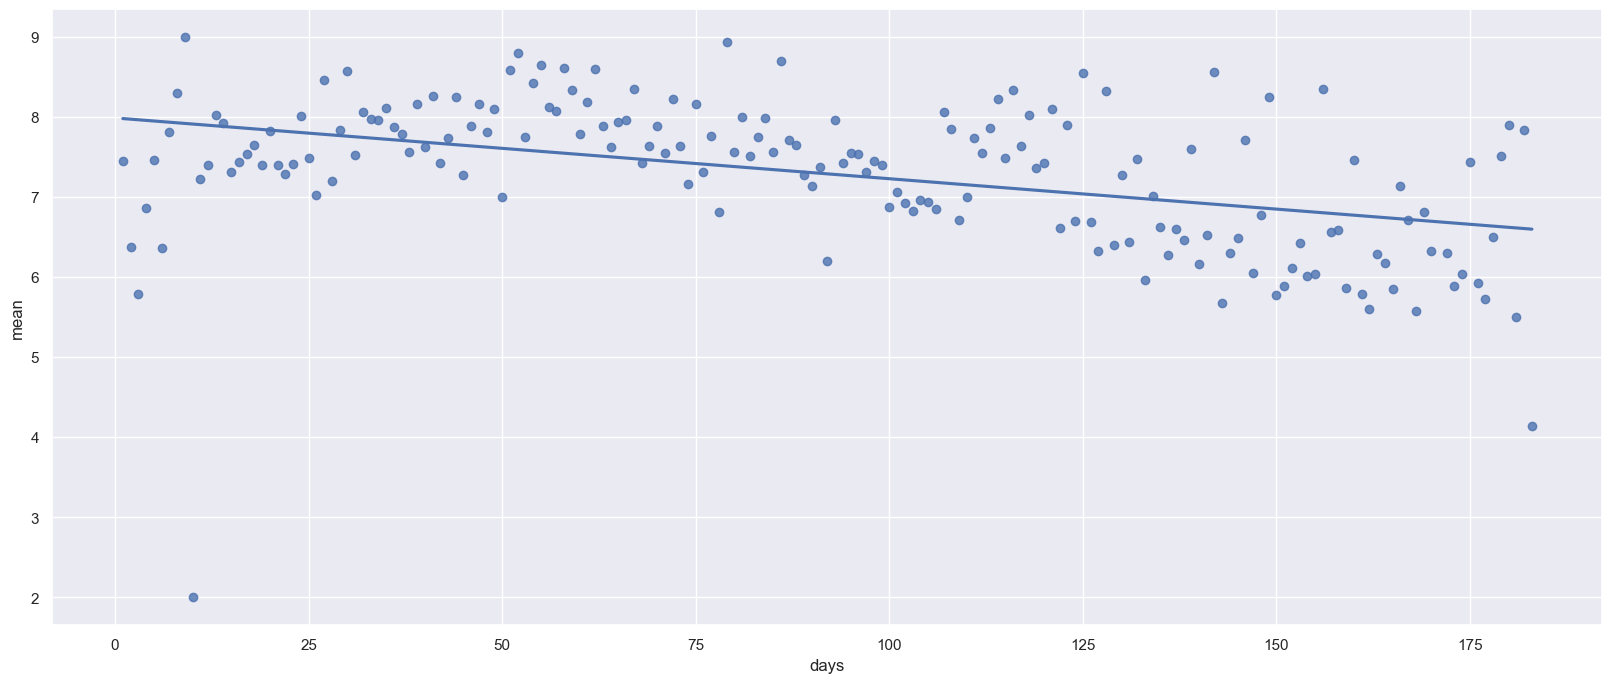

In [801]:
data_total_mean_cs = data.groupby(data['days']).nunique()
data_total_mean_cs = data_total_mean_cs[['internship', 'id']].copy()
data_total_mean_cs['mean'] = data_total_mean_cs['id'] / data_total_mean_cs['internship'] #Nb moyen de consultation par stage, à chaque jour écoulé depuis le début du stage. 

display(data_total_mean_cs)
sns.set_theme(rc = { 'figure.figsize':(20,8) })
sns.regplot(x=data_total_mean_cs.index, y=data_total_mean_cs['mean'], ci=None)

<AxesSubplot:xlabel='days', ylabel='internship'>

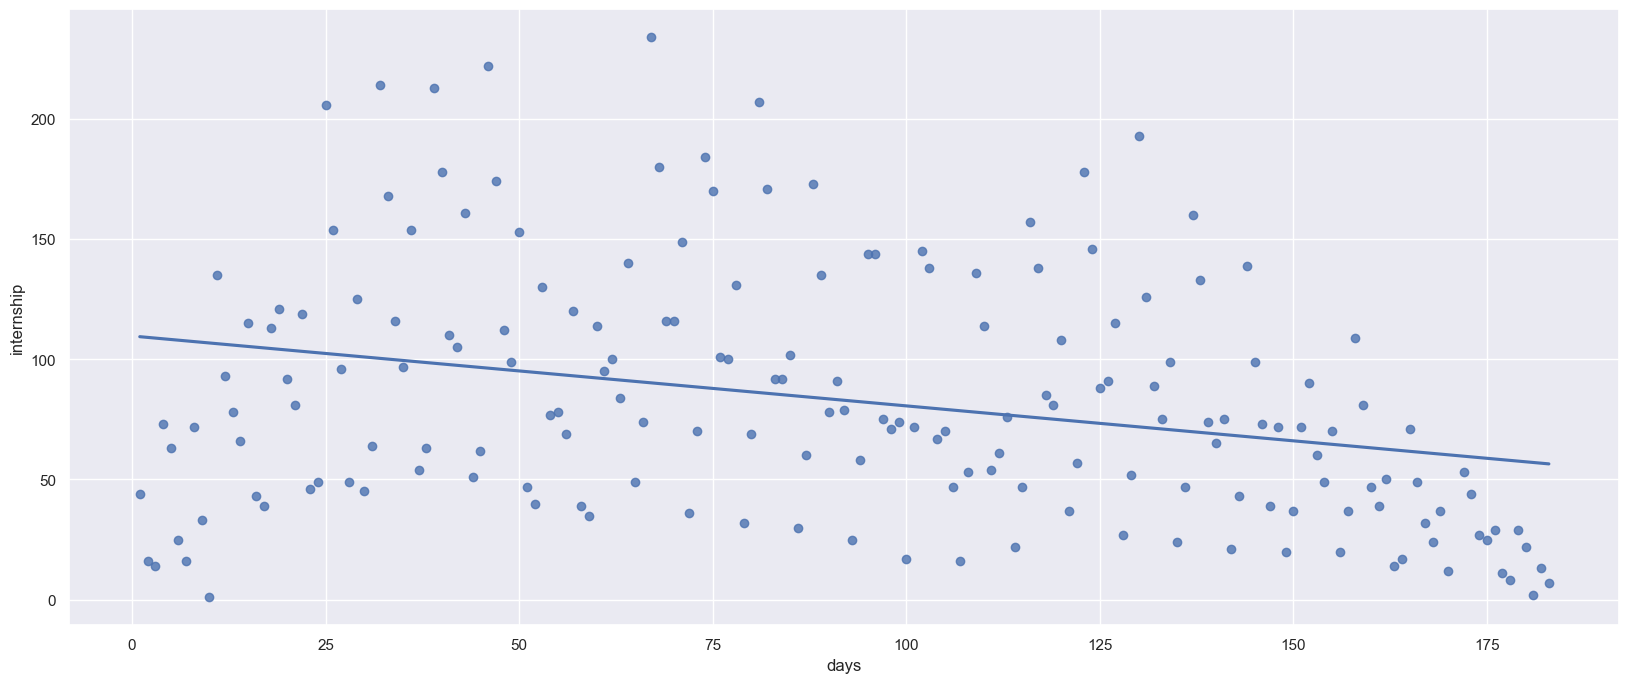

In [802]:
# Evolution du nombre de stage pour lesquelles au moins une consultation est entrée, en fonction du temps écoulé depuis le début du stage (en jours)
sns.regplot(x=data_total_mean_cs.index, y=data_total_mean_cs['internship'], ci=None)

<AxesSubplot:xlabel='days', ylabel='id'>

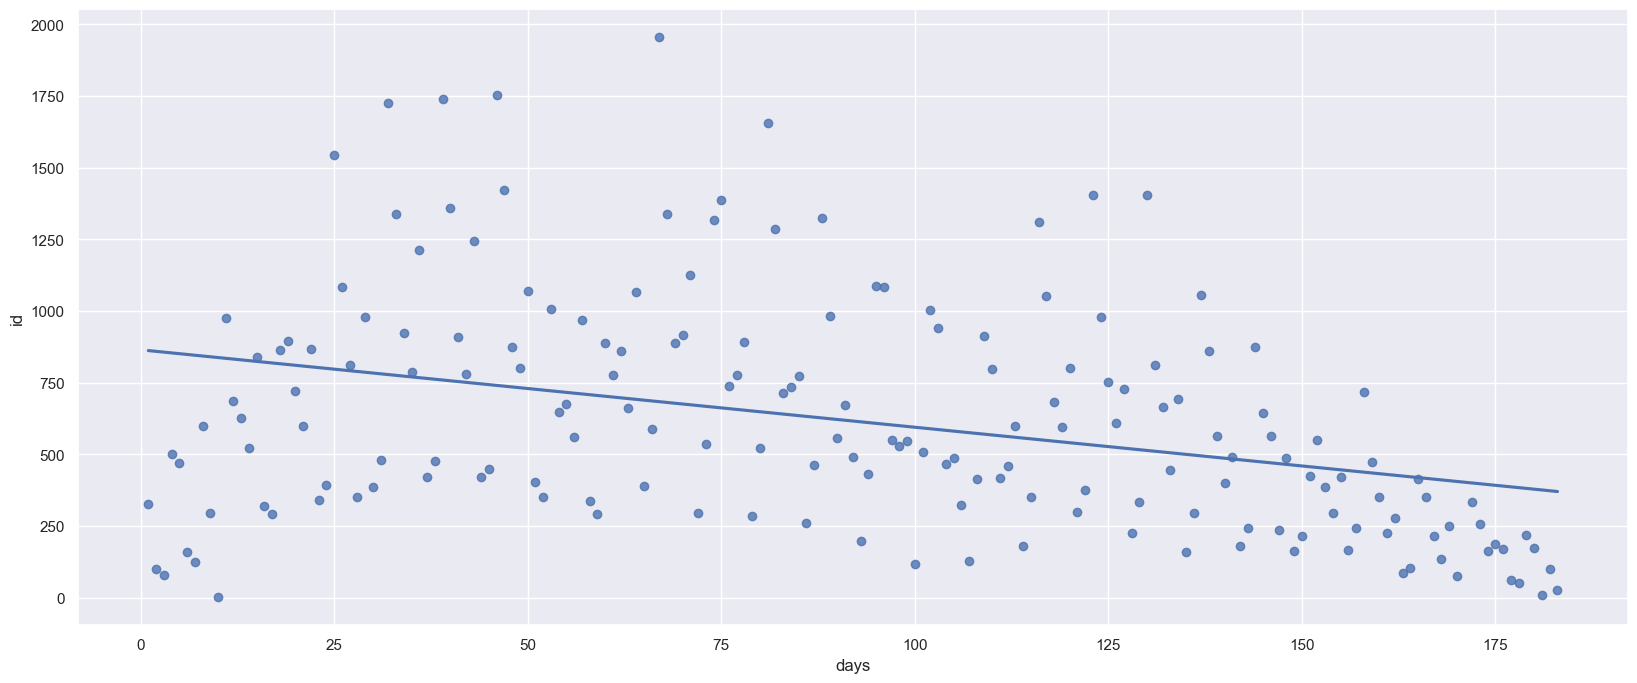

In [803]:
# Evolution du nombre total de consultations entrées chaque jour (exprimé en fonction du délai écoulé depuis le début du stage)
sns.regplot(x=data_total_mean_cs.index, y=data_total_mean_cs['id'], ci=None)

,internship,id,mean
days,,,
1,11,50,4.545455
2,5,32,6.400000
3,2,4,2.000000
4,11,54,4.909091
5,9,37,4.111111
...,...,...,...
179,14,82,5.857143
180,9,44,4.888889
181,1,4,4.000000


<AxesSubplot:xlabel='days', ylabel='mean'>

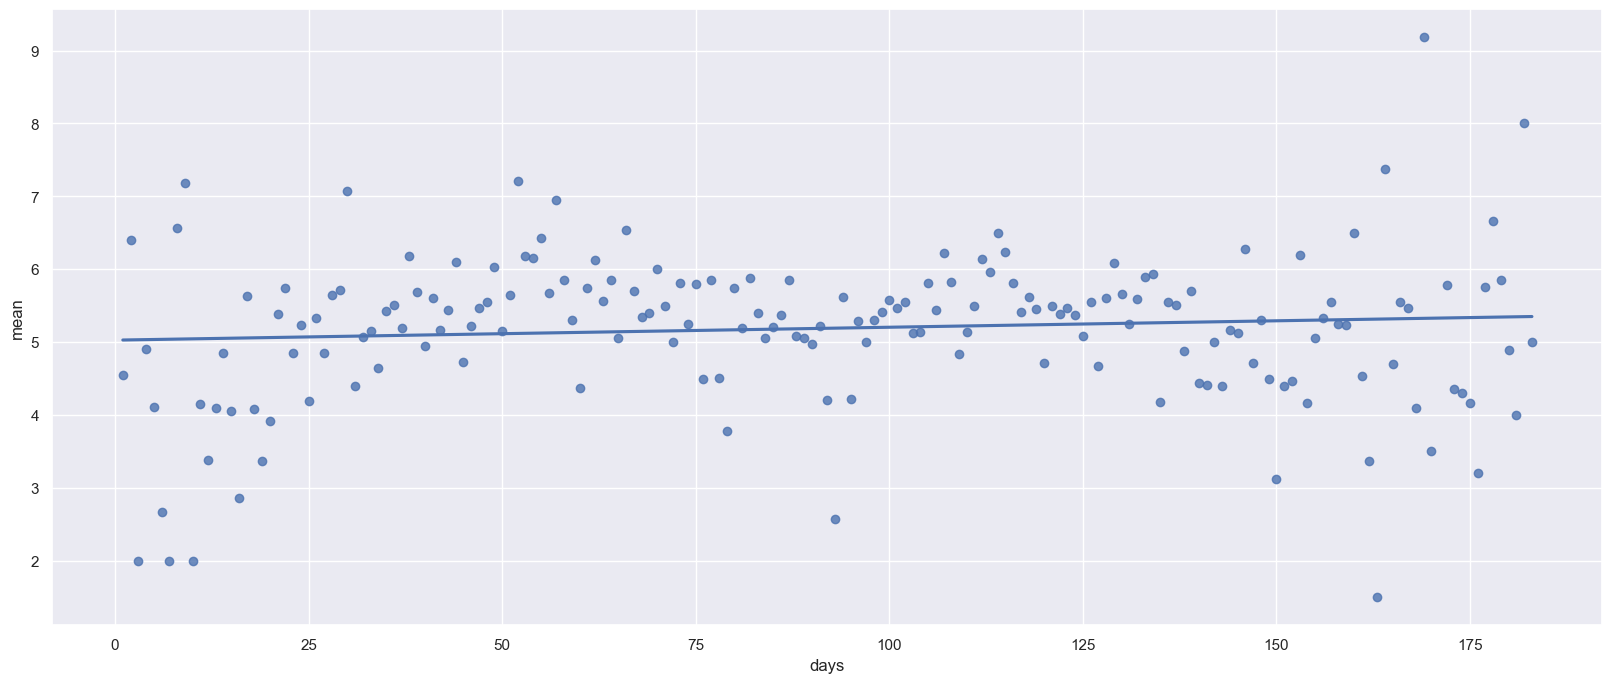

In [804]:
data_sn1_mean_cs = data_sn1.groupby(data['days']).nunique()

data_sn1_mean_cs = data_sn1_mean_cs[['internship', 'id']].copy()
data_sn1_mean_cs['mean'] = data_sn1_mean_cs['id'] / data_sn1_mean_cs['internship']

display(data_sn1_mean_cs)
sns.set_theme(rc = { 'figure.figsize':(20,8) })
sns.regplot(x=data_sn1_mean_cs.index, y=data_sn1_mean_cs['mean'], ci=None)


,internship,id,mean
days,,,
1,29,252,8.689655
2,10,67,6.700000
3,10,72,7.200000
4,54,404,7.481481
5,45,387,8.600000
...,...,...,...
179,13,133,10.230769
180,13,130,10.000000
181,1,7,7.000000


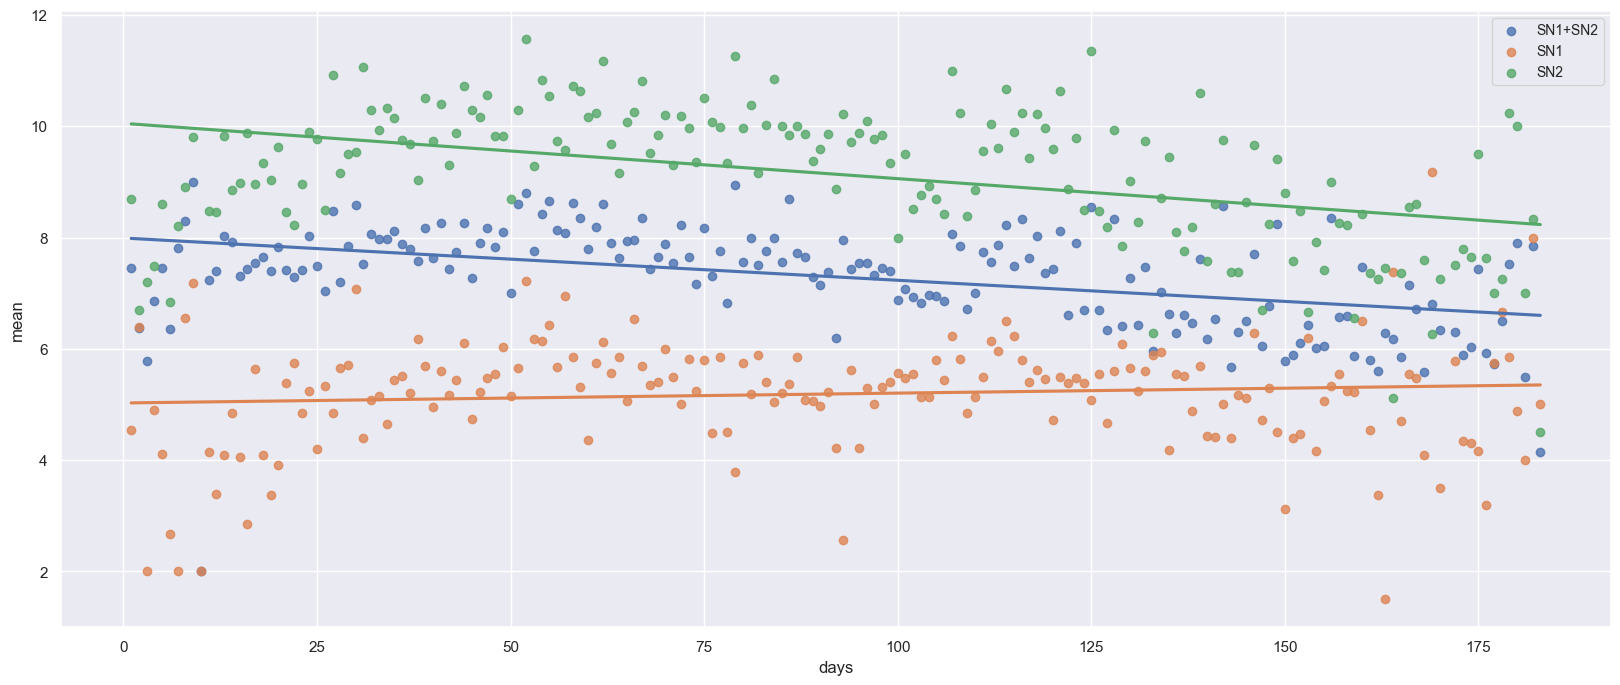

In [805]:
data_sn2_mean_cs = data_sn2.groupby(data['days']).nunique()

data_sn2_mean_cs = data_sn2_mean_cs[['internship', 'id']].copy()
data_sn2_mean_cs['mean'] = data_sn2_mean_cs['id'] / data_sn2_mean_cs['internship']

display(data_sn2_mean_cs)
sns.set_theme(rc = { 'figure.figsize':(20,8) })
sns.regplot(x=data_total_mean_cs.index, y=data_total_mean_cs['mean'], ci=None, label="SN1+SN2")
sns.regplot(x=data_sn1_mean_cs.index, y=data_sn1_mean_cs['mean'], ci=None, label="SN1")
sns.regplot(x=data_sn2_mean_cs.index, y=data_sn2_mean_cs['mean'], ci=None, label="SN2")
plt.legend(fontsize=10)

count    112423.000000
mean          6.627603
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         191.000000
std          20.250827
Name: delay, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

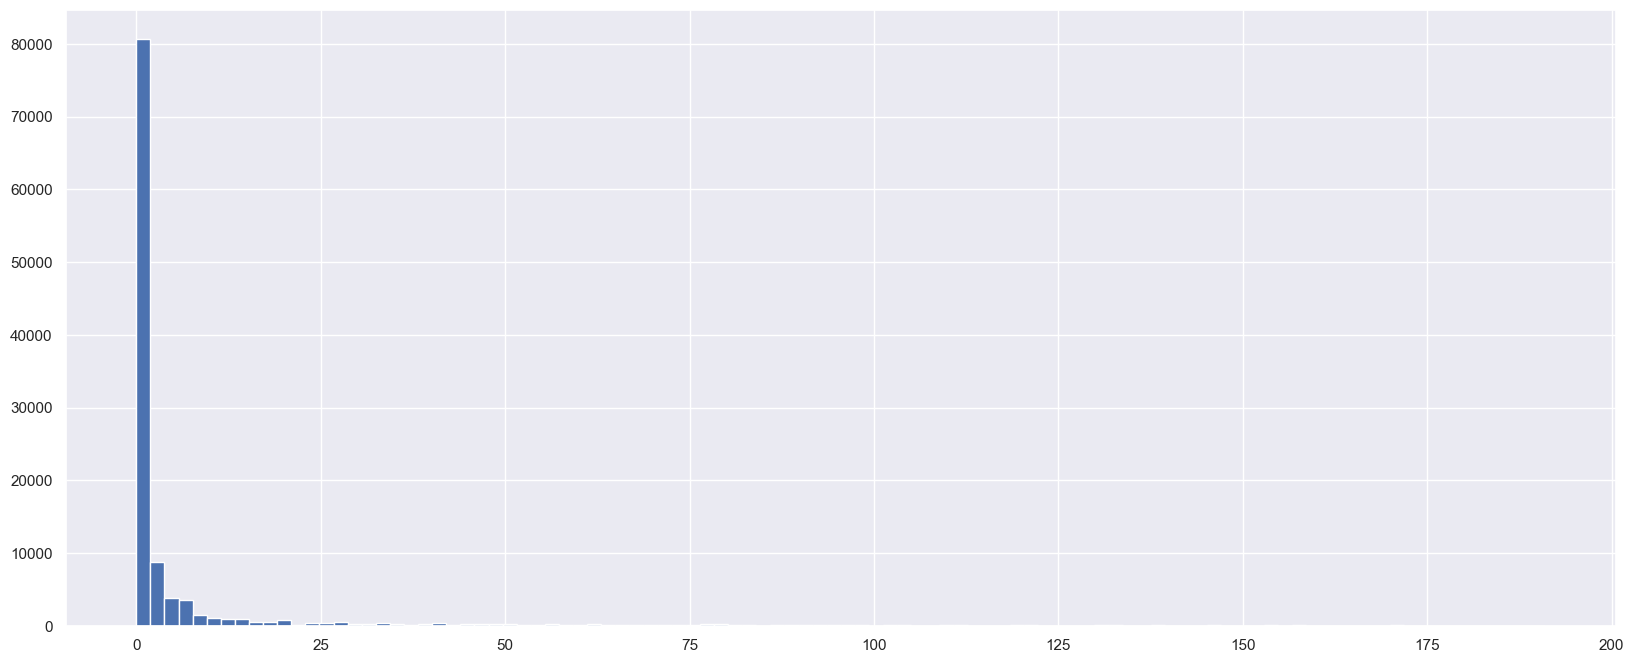

In [806]:
display(data.describe()['delay'])

data['delay'].hist(bins=100)
plt.show

code,days,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
0,1,72,70,43,53,39,9,16,10,11,2,3,328
1,2,25,22,22,15,5,3,2,1,3,4,0,102
2,3,14,23,9,10,4,8,7,0,3,0,3,81
3,4,123,126,72,67,36,12,16,10,21,9,9,501
4,5,85,125,80,47,28,9,23,9,34,14,16,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,179,42,62,49,22,11,6,9,4,9,1,3,218
178,180,35,44,27,19,14,5,10,5,8,2,5,174
179,181,2,4,2,2,0,0,0,0,1,0,0,11
180,182,22,26,8,12,12,3,3,3,6,4,3,102


code,days,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
0,1,72,70,43,53,39,9,16,10,11,2,3,328
1,2,97,92,65,68,44,12,18,11,14,6,3,430
2,3,111,115,74,78,48,20,25,11,17,6,6,511
3,4,234,241,146,145,84,32,41,21,38,15,15,1012
4,5,319,366,226,192,112,41,64,30,72,29,31,1482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,179,20898,27090,16594,18821,7523,2530,4786,3295,5251,2556,2763,112107
178,180,20933,27134,16621,18840,7537,2535,4796,3300,5259,2558,2768,112281
179,181,20935,27138,16623,18842,7537,2535,4796,3300,5260,2558,2768,112292
180,182,20957,27164,16631,18854,7549,2538,4799,3303,5266,2562,2771,112394


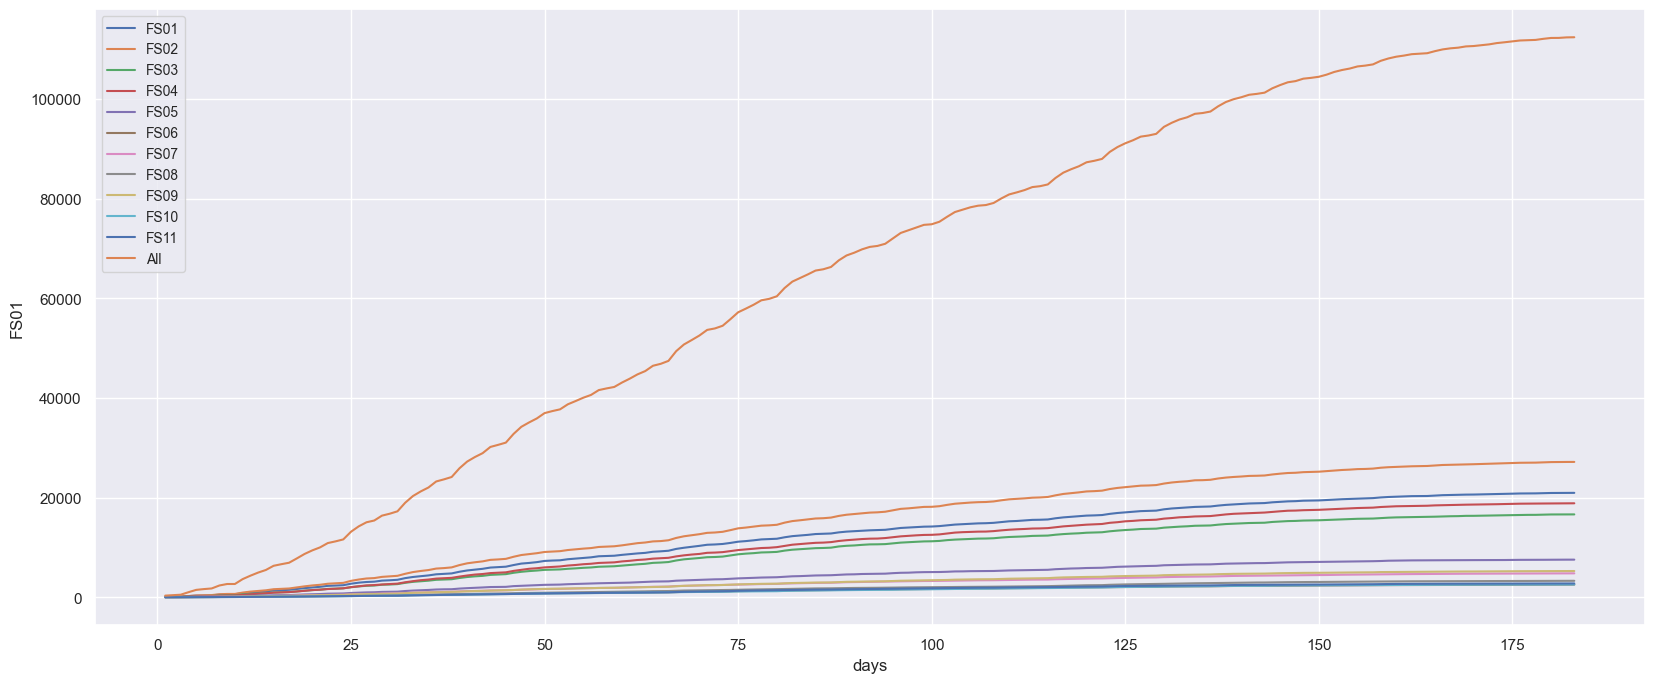

In [807]:
data_fs_by_day = pd.crosstab(data['days'], data['code'], margins=True)
data_fs_by_day = data_fs_by_day.drop(labels="All", axis=0)
data_fs_by_day = data_fs_by_day.reset_index()

display(data_fs_by_day)

# Calcul des valeurs cumulées. 
for i in data_fs_by_day.index :
    # print(i)
    if i > 0 :
        for situation in FS :
            data_fs_by_day.loc[i, situation] = data_fs_by_day.loc[i, situation] + data_fs_by_day.loc[(i-1), situation]
        data_fs_by_day.loc[i, 'All'] = data_fs_by_day.loc[i, 'All'] + data_fs_by_day.loc[(i-1), 'All']
        


display(data_fs_by_day)

for situation in FS : 
    sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day[situation], label=situation)
sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day['All'], label='All')
plt.legend(fontsize=10)



# data.loc[data['consultation_day'] == 0, 'consultation_day'] = 'monday'


,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:08:04,2023-05-02 23:08:04,26,homme,directe,FS11,SN1,summer,tuesday,1,0
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:10:42,2023-05-02 23:10:42,27,femme,directe,FS08,SN1,summer,tuesday,1,0
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:22:54,2023-05-02 23:22:54,26,femme,directe,FS02,SN1,summer,tuesday,1,0
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:24:02,2023-05-02 23:24:02,50,homme,directe,FS01,SN1,summer,tuesday,1,0
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:25:16,2023-05-02 23:25:16,60,femme,directe,FS01,SN1,summer,tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83377,29753,01927b47-1855-7876-badf-740da2816e99,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:11:49,2024-10-11 13:11:49,0,homme,indirecte,FS04,SN2,summer,friday,162,0
83378,29754,01927b48-2da6-7b04-a6f8-4ac6a1950c6d,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:13:00,2024-10-11 13:13:00,43,femme,indirecte,FS05,SN2,summer,friday,162,0
83379,29755,01927b4f-d495-7db4-b576-6dea10f3f7e8,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:21:22,2024-10-11 13:21:22,48,femme,indirecte,FS05,SN2,summer,friday,162,0
83380,29756,01927b50-6192-79df-8f7f-2f4620f80fe2,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:21:58,2024-10-11 13:21:58,85,homme,indirecte,FS01,SN2,summer,friday,162,0


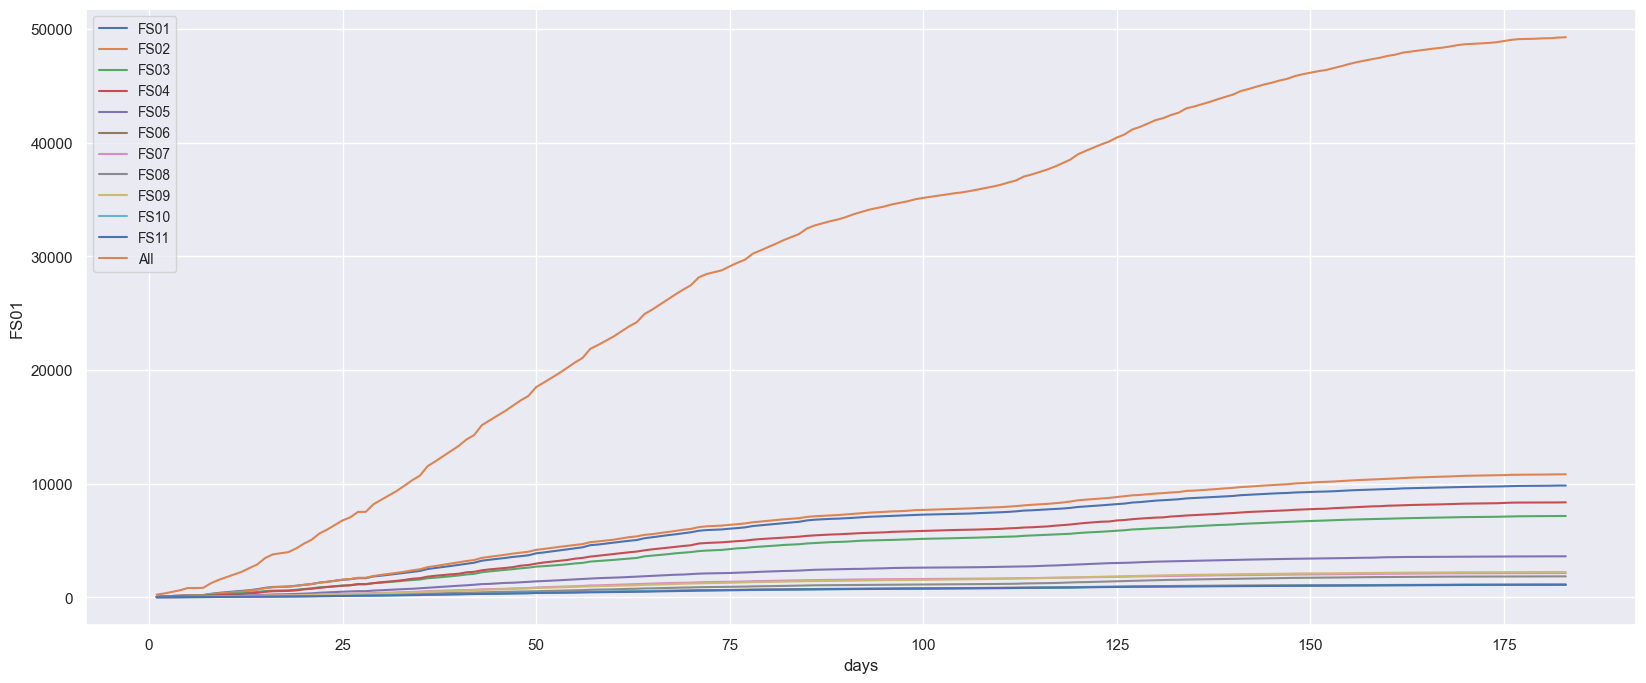

In [808]:
data_summer = data.loc[data['season'] == 'summer']

display(data_summer)

data_fs_by_day = pd.crosstab(data_summer['days'], data_summer['code'], margins=True)
data_fs_by_day = data_fs_by_day.drop(labels="All", axis=0)
data_fs_by_day = data_fs_by_day.reset_index()

# display(data_fs_by_day)


for i in data_fs_by_day.index :
    # print(i)
    if i > 0 :
        for situation in FS :
            data_fs_by_day.loc[i, situation] = data_fs_by_day.loc[i, situation] + data_fs_by_day.loc[(i-1), situation]
        data_fs_by_day.loc[i, 'All'] = data_fs_by_day.loc[i, 'All'] + data_fs_by_day.loc[(i-1), 'All']
        


# display(data_fs_by_day)

for situation in FS : 
    sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day[situation], label=situation)
sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day['All'], label='All')
plt.legend(fontsize=10)

,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
23909,0,018c243d-eb9d-7ff3-8edb-65757695c9e6,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:18:07,2023-12-01 08:18:07,59,homme,indirecte,FS01,SN2,winter,wednesday,27,2
23910,1,018c243f-b3d3-7246-ab4e-c3c44957a710,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:20:03,2023-12-01 08:20:03,29,femme,indirecte,FS03,SN2,winter,wednesday,27,2
23911,2,018c2441-370c-7600-915e-6ef80ae6311b,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:21:42,2023-12-01 08:21:42,0,femme,indirecte,FS04,SN2,winter,wednesday,27,2
23912,3,018c2442-b128-7e54-a4b1-439759c7b470,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:23:19,2023-12-01 08:23:19,47,femme,indirecte,FS07,SN2,winter,wednesday,27,2
23913,4,018c2446-7f2b-7fde-a88a-a2bede489e7e,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:27:29,2023-12-01 08:27:29,47,femme,indirecte,FS09,SN2,winter,wednesday,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116182,35808,01961a62-753a-70da-a1e6-e688d1ea7d52,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:49:42,2025-04-09 13:49:42,52,femme,indirecte,FS07,SN2,winter,tuesday,67,92
116184,35810,01961a63-7351-7421-9dd0-bed6ac35c47a,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-22,2025-04-09 13:50:47,2025-04-09 13:50:47,2,femme,indirecte,FS04,SN2,winter,wednesday,82,77
116186,35812,01961a64-59e0-7736-af45-e0e1d95ac7c7,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-08,2025-04-09 13:51:46,2025-04-09 13:51:46,4,femme,indirecte,FS04,SN2,winter,wednesday,68,91
116187,35813,01961a65-09e4-7119-bd33-593dca00fb38,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:52:31,2025-04-09 13:52:31,37,femme,indirecte,FS11,SN2,winter,tuesday,67,92


code,days,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
0,1,20,21,12,18,8,3,3,2,6,1,0,94
1,3,14,23,9,10,4,8,7,0,3,0,3,81
2,4,56,62,29,22,13,7,9,5,12,5,2,222
3,5,42,84,44,35,13,5,11,3,19,8,10,274
4,6,32,38,17,32,17,3,8,4,5,1,0,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,176,17,16,7,11,1,1,8,2,1,1,2,67
150,178,8,22,4,7,1,1,1,1,6,1,0,52
151,179,37,54,42,21,10,5,8,3,6,1,2,189
152,180,23,35,20,18,12,5,8,5,5,1,5,137


code,days,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
0,1,20,21,12,18,8,3,3,2,6,1,0,94
1,3,34,44,21,28,12,11,10,2,9,1,3,175
2,4,90,106,50,50,25,18,19,7,21,6,5,397
3,5,132,190,94,85,38,23,30,10,40,14,15,671
4,6,164,228,111,117,55,26,38,14,45,15,15,828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,176,11052,16225,9414,10460,3919,1405,2650,1453,3021,1463,1662,62724
150,178,11060,16247,9418,10467,3920,1406,2651,1454,3027,1464,1662,62776
151,179,11097,16301,9460,10488,3930,1411,2659,1457,3033,1465,1664,62965
152,180,11120,16336,9480,10506,3942,1416,2667,1462,3038,1466,1669,63102


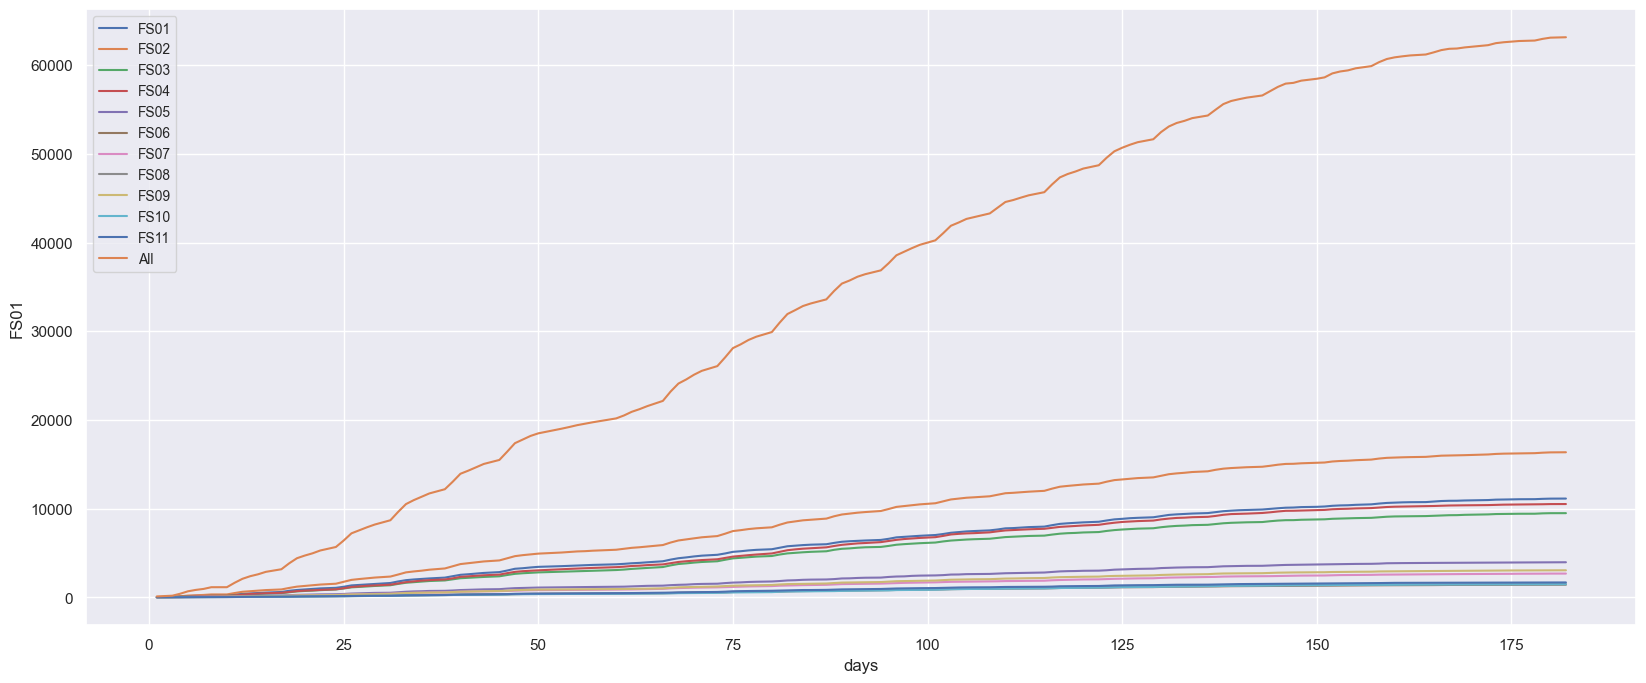

In [809]:
data_winter = data.loc[data['season'] == 'winter']

display(data_winter)

data_fs_by_day = pd.crosstab(data_winter['days'], data_winter['code'], margins=True)
data_fs_by_day = data_fs_by_day.drop(labels="All", axis=0)
data_fs_by_day = data_fs_by_day.reset_index()

display(data_fs_by_day)


for i in data_fs_by_day.index :
    # print(i)
    if i > 0 :
        for situation in FS :
            data_fs_by_day.loc[i, situation] = data_fs_by_day.loc[i, situation] + data_fs_by_day.loc[(i-1), situation]
        data_fs_by_day.loc[i, 'All'] = data_fs_by_day.loc[i, 'All'] + data_fs_by_day.loc[(i-1), 'All']
        
display(data_fs_by_day)

for situation in FS : 
    sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day[situation], label=situation)
sns.lineplot(x=data_fs_by_day['days'], y=data_fs_by_day['All'], label='All')
plt.legend(fontsize=10)

,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
23909,0,018c243d-eb9d-7ff3-8edb-65757695c9e6,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:18:07,2023-12-01 08:18:07,59,homme,indirecte,FS01,SN2,winter,wednesday,27,2
23910,1,018c243f-b3d3-7246-ab4e-c3c44957a710,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:20:03,2023-12-01 08:20:03,29,femme,indirecte,FS03,SN2,winter,wednesday,27,2
23911,2,018c2441-370c-7600-915e-6ef80ae6311b,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:21:42,2023-12-01 08:21:42,0,femme,indirecte,FS04,SN2,winter,wednesday,27,2
23912,3,018c2442-b128-7e54-a4b1-439759c7b470,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:23:19,2023-12-01 08:23:19,47,femme,indirecte,FS07,SN2,winter,wednesday,27,2
23913,4,018c2446-7f2b-7fde-a88a-a2bede489e7e,1ed8105d-bf47-613e-9d71-91b15023c51a,1ee7186d-f84e-6456-9412-953460c11caa,20231,1ed8105d-c21d-6bba-92c5-91b15023c51a,2023-11-29,2023-12-01 08:27:29,2023-12-01 08:27:29,47,femme,indirecte,FS09,SN2,winter,wednesday,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116182,35808,01961a62-753a-70da-a1e6-e688d1ea7d52,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:49:42,2025-04-09 13:49:42,52,femme,indirecte,FS07,SN2,winter,tuesday,67,92
116184,35810,01961a63-7351-7421-9dd0-bed6ac35c47a,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-22,2025-04-09 13:50:47,2025-04-09 13:50:47,2,femme,indirecte,FS04,SN2,winter,wednesday,82,77
116186,35812,01961a64-59e0-7736-af45-e0e1d95ac7c7,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-08,2025-04-09 13:51:46,2025-04-09 13:51:46,4,femme,indirecte,FS04,SN2,winter,wednesday,68,91
116187,35813,01961a65-09e4-7119-bd33-593dca00fb38,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:52:31,2025-04-09 13:52:31,37,femme,indirecte,FS11,SN2,winter,tuesday,67,92


,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:08:04,2023-05-02 23:08:04,26,homme,directe,FS11,SN1,summer,tuesday,1,0
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:10:42,2023-05-02 23:10:42,27,femme,directe,FS08,SN1,summer,tuesday,1,0
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:22:54,2023-05-02 23:22:54,26,femme,directe,FS02,SN1,summer,tuesday,1,0
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:24:02,2023-05-02 23:24:02,50,homme,directe,FS01,SN1,summer,tuesday,1,0
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:25:16,2023-05-02 23:25:16,60,femme,directe,FS01,SN1,summer,tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83377,29753,01927b47-1855-7876-badf-740da2816e99,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:11:49,2024-10-11 13:11:49,0,homme,indirecte,FS04,SN2,summer,friday,162,0
83378,29754,01927b48-2da6-7b04-a6f8-4ac6a1950c6d,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:13:00,2024-10-11 13:13:00,43,femme,indirecte,FS05,SN2,summer,friday,162,0
83379,29755,01927b4f-d495-7db4-b576-6dea10f3f7e8,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:21:22,2024-10-11 13:21:22,48,femme,indirecte,FS05,SN2,summer,friday,162,0
83380,29756,01927b50-6192-79df-8f7f-2f4620f80fe2,1ed8105d-c18c-6336-9140-91b15023c51a,018ea469-4ca9-78db-886c-eab83431d05e,20232,1ed8105d-c1f6-61aa-abdd-91b15023c51a,2024-10-11,2024-10-11 13:21:58,2024-10-11 13:21:58,85,homme,indirecte,FS01,SN2,summer,friday,162,0


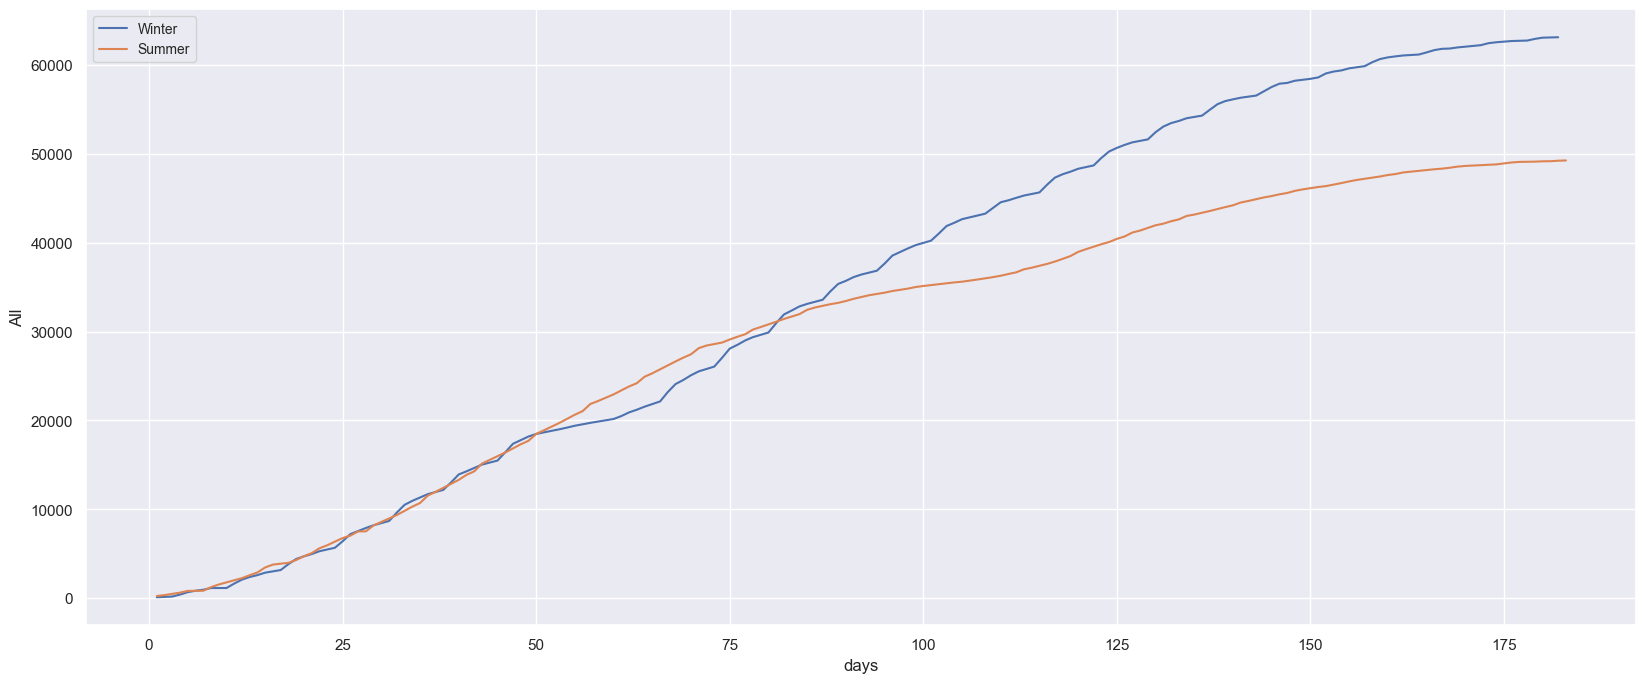

In [810]:
display(data_winter)
display(data_summer)

data_winter_by_day = pd.crosstab(data_winter['days'], data_winter['code'], margins=True)
data_winter_by_day = data_winter_by_day.drop(labels="All", axis=0)
data_winter_by_day = data_winter_by_day.reset_index()

data_summer_by_day = pd.crosstab(data_summer['days'], data_summer['code'], margins=True)
data_summer_by_day = data_summer_by_day.drop(labels="All", axis=0)
data_summer_by_day = data_summer_by_day.reset_index()

for i in data_winter_by_day.index :
    # print(i)
    if i > 0 :
        for situation in FS :
            data_winter_by_day.loc[i, situation] = data_winter_by_day.loc[i, situation] + data_winter_by_day.loc[(i-1), situation]
        data_winter_by_day.loc[i, 'All'] = data_winter_by_day.loc[i, 'All'] + data_winter_by_day.loc[(i-1), 'All']

for i in data_summer_by_day.index :
    # print(i)
    if i > 0 :
        for situation in FS :
            data_summer_by_day.loc[i, situation] = data_summer_by_day.loc[i, situation] + data_summer_by_day.loc[(i-1), situation]
        data_summer_by_day.loc[i, 'All'] = data_summer_by_day.loc[i, 'All'] + data_summer_by_day.loc[(i-1), 'All']

sns.lineplot(x=data_winter_by_day['days'], y=data_winter_by_day['All'], label='Winter')
sns.lineplot(x=data_summer_by_day['days'], y=data_summer_by_day['All'], label='Summer')
plt.legend(fontsize=10)

### Distribution du nombre de consultation par RAQ (total et par stage).

In [811]:
# Nombre d'occurence de chaque famille de situation dans les différents RAQ. 
data_internship = pd.crosstab(data['internship'], data['code'], margins=True)
data_internship = data_internship.drop(labels="All", axis=0)
data_internship

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
internship,,,,,,,,,,,,
018e9ef3-fbd6-711a-ac2b-dedf2c35fe83,35,50,24,16,3,1,8,0,11,1,1,150
018e9ef4-4c06-7912-ba23-3627ee5de415,6,7,5,6,0,0,1,1,4,1,0,31
018e9ef4-99c4-7b3f-a4ef-5451beb41d12,40,38,22,21,4,2,3,7,6,3,3,149
018e9ef5-0538-7b34-87a0-bf24166f5be7,43,81,83,4,1,0,0,3,11,0,0,226
018ea3f7-45f4-7c46-8282-4be5d1fa7add,17,14,25,15,11,1,5,1,4,1,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...
1ee718b2-cf2b-63e0-b40b-4bd96df4c490,12,42,12,61,3,1,6,7,3,2,1,150
1ee718b3-cbf9-6bb2-a0cb-9f4ab804bab7,2,29,5,101,0,0,0,1,2,0,10,150
1ee718cc-a083-6c08-9f7f-d37146709581,42,138,12,31,4,0,6,3,2,4,3,245


In [812]:
data_internship.describe()

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,56.953804,73.831522,45.203804,51.263587,20.519022,6.899457,13.043478,8.975543,14.312500,6.961957,7.532609,305.497283
std,44.607773,67.966564,39.368922,40.832129,37.101814,9.068507,11.907603,9.997926,14.385985,7.957905,10.859470,186.656864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,25.000000,32.000000,17.000000,19.000000,5.000000,1.000000,4.000000,2.000000,4.000000,1.000000,1.000000,157.000000
50%,43.000000,53.500000,32.500000,40.500000,10.000000,4.000000,9.000000,5.000000,10.000000,4.000000,4.000000,242.000000
75%,83.000000,101.250000,65.000000,73.000000,20.000000,9.250000,20.250000,13.000000,19.000000,10.000000,9.000000,450.000000
max,270.000000,716.000000,266.000000,212.000000,275.000000,74.000000,71.000000,59.000000,75.000000,58.000000,89.000000,1128.000000


<function matplotlib.pyplot.show(close=None, block=None)>

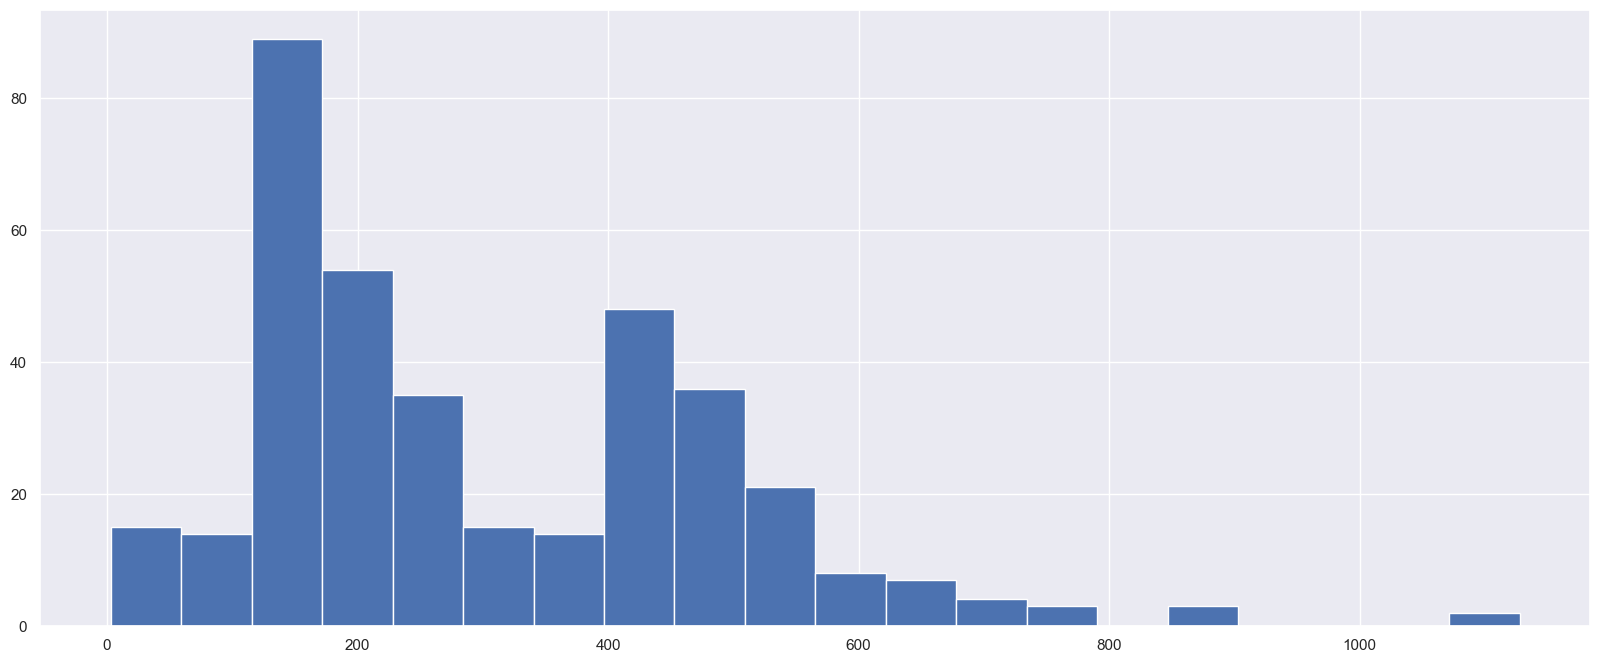

In [813]:
## Histogramme représentant le nombre de consultation dans les différents RAQ. 
data_internship['All'].hist(bins=20)
plt.show

In [814]:
data_internship_sn1 = pd.crosstab(data_sn1['internship'], data['code'], margins=True)
data_internship_sn1 = data_internship_sn1.drop(labels="All", axis=0)

data_internship_sn2 = pd.crosstab(data_sn2['internship'], data['code'], margins=True)
data_internship_sn2 = data_internship_sn2.drop(labels="All", axis=0)

data_internship_se = pd.crosstab(data_se['internship'], data['code'], margins=True)
data_internship_se = data_internship_se.drop(labels="All", axis=0)

data_internship_sf = pd.crosstab(data_sf['internship'], data['code'], margins=True)
data_internship_sf = data_internship_sf.drop(labels="All", axis=0)

print("Stages de SN1")
display(data_internship_sn1)
display(data_internship_sn1.describe())

print("Stages de SN2")
display(data_internship_sn2)
display(data_internship_sn2.describe())

print("Stages de Santé de la femme")
display(data_internship_se)
display(data_internship_se.describe())

print("Stages de Santé de l'enfant")
display(data_internship_sf)
display(data_internship_sf.describe())


Stages de SN1


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
internship,,,,,,,,,,,,
018e9ef3-fbd6-711a-ac2b-dedf2c35fe83,35,50,24,16,3,1,8,0,11,1,1,150
018e9ef4-4c06-7912-ba23-3627ee5de415,6,7,5,6,0,0,1,1,4,1,0,31
018e9ef4-99c4-7b3f-a4ef-5451beb41d12,40,38,22,21,4,2,3,7,6,3,3,149
018e9ef5-0538-7b34-87a0-bf24166f5be7,43,81,83,4,1,0,0,3,11,0,0,226
018ea3f7-45f4-7c46-8282-4be5d1fa7add,17,14,25,15,11,1,5,1,4,1,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...
1ee71855-acdb-6518-bc12-c32f6b0f1354,39,125,29,47,7,1,11,1,16,8,1,285
1ee71856-7b50-69ca-bc20-f30067a168b9,19,22,28,2,0,1,7,3,0,0,0,82
1ee71862-e2c1-62f6-ad6b-01a3c506b3b7,26,46,26,12,12,2,8,9,9,6,4,160


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,37.589595,48.416185,27.786127,25.289017,7.115607,2.872832,6.930636,4.306358,8.508671,4.716763,3.329480,176.861272
std,22.515868,33.221599,21.879571,18.935255,5.925746,2.852174,5.444844,4.347388,6.711339,5.436270,4.298607,90.297012
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,25.000000,30.000000,14.000000,13.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,140.000000
50%,34.000000,43.000000,24.000000,21.000000,6.000000,2.000000,6.000000,3.000000,8.000000,3.000000,2.000000,164.000000
75%,47.000000,59.000000,35.000000,33.000000,10.000000,4.000000,9.000000,6.000000,12.000000,6.000000,5.000000,209.000000
max,139.000000,253.000000,157.000000,137.000000,39.000000,12.000000,38.000000,26.000000,30.000000,26.000000,33.000000,651.000000


Stages de SN2


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
internship,,,,,,,,,,,,
018ea462-d9e9-7265-a773-49563b705b4b,97,95,150,103,24,8,16,36,55,15,14,613
018ea463-7993-747a-bd09-88792ccd6ad4,60,87,52,82,18,25,38,28,41,10,10,451
018ea463-b3d6-784c-a632-174fc45851ac,67,86,109,38,10,22,16,37,14,2,4,405
018ea464-6706-7780-ba1d-9b18ad27d0af,64,136,37,95,25,11,34,21,29,8,20,480
018ea464-b328-75c5-ba39-b3f160f7d5b0,87,156,69,37,17,7,26,28,11,3,1,442
...,...,...,...,...,...,...,...,...,...,...,...,...
1ee71899-e48e-6908-8bba-2f54f5a1cee9,104,70,88,74,39,7,22,9,13,10,7,443
1ee7189a-7ec1-6d5e-b45b-410092a9101d,63,173,52,45,24,8,25,7,29,17,5,448
1ee718cc-a083-6c08-9f7f-d37146709581,42,138,12,31,4,0,6,3,2,4,3,245


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,95.706294,122.503497,76.237762,74.678322,19.699301,11.783217,23.951049,16.790210,24.223776,10.678322,12.776224,489.027972
std,42.649378,79.680866,41.672762,34.346536,10.902277,10.399174,11.071044,11.373835,17.276305,9.542788,13.729489,145.205049
min,12.000000,28.000000,6.000000,5.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,104.000000
25%,68.500000,70.000000,47.000000,51.500000,11.000000,6.000000,16.000000,9.000000,12.000000,4.000000,3.500000,439.000000
50%,92.000000,114.000000,69.000000,70.000000,18.000000,10.000000,23.000000,14.000000,20.000000,9.000000,7.000000,461.000000
75%,118.000000,146.500000,101.000000,95.000000,25.000000,15.000000,30.000000,23.000000,33.000000,15.000000,19.000000,525.000000
max,270.000000,716.000000,266.000000,166.000000,55.000000,73.000000,71.000000,59.000000,75.000000,58.000000,89.000000,1128.000000


Stages de Santé de la femme


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
internship,,,,,,,,,,,,
018ea50b-f453-745b-8e91-fe272b86a4b1,2,24,15,137,11,2,2,2,12,18,17,242
018ea50c-7f40-7dfc-838e-5dab445fb286,30,12,29,98,0,2,0,1,9,5,11,197
018ea50d-30cc-75b1-87ce-2588161fd914,22,62,3,100,1,1,1,3,3,1,4,201
018ea50d-c09f-7215-abb3-8186231e91fa,3,17,7,50,3,1,0,0,0,4,6,91
018ea50e-4a0e-771d-a960-9f6d38610305,32,14,10,190,4,0,1,0,17,24,4,296
018ea50e-e30e-7519-abeb-f95376820acd,4,22,6,84,0,1,0,0,2,0,0,119
018ea50f-9aa1-7dda-afe1-c6492c884747,31,45,31,123,12,8,23,9,29,16,30,357
018ea510-5d2a-7c0e-91e4-98bdcc6e6716,14,10,25,132,4,3,4,1,5,2,1,201
018f9fc7-3082-7081-8137-e811b5585aa7,17,22,18,23,3,2,9,3,7,6,4,114


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,10.333333,26.750000,18.333333,104.333333,3.041667,1.500000,2.916667,3.416667,6.583333,6.000000,9.083333,192.291667
std,10.205142,17.959495,14.589057,49.030307,3.394102,1.817787,5.003622,4.363053,6.915117,8.225094,14.693733,60.000347
min,0.000000,1.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000
25%,2.000000,13.500000,6.750000,78.250000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,151.500000
50%,6.000000,23.500000,14.500000,99.500000,2.500000,1.000000,1.000000,1.000000,4.000000,2.000000,4.000000,191.000000
75%,15.500000,33.000000,26.000000,128.250000,4.250000,2.000000,4.000000,5.250000,9.500000,6.500000,11.000000,220.250000
max,32.000000,69.000000,57.000000,212.000000,12.000000,8.000000,23.000000,16.000000,29.000000,30.000000,68.000000,357.000000


Stages de Santé de l'enfant


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
internship,,,,,,,,,,,,
018ea511-2ee2-7050-9c5a-fba085785014,6,28,40,10,241,12,3,1,2,0,1,344
018ea511-c6c7-7228-a017-d72e79574e2e,4,10,9,2,195,22,2,1,5,5,5,260
018ea512-3f3c-7b7e-9366-1906766ced81,30,18,31,13,23,2,5,5,8,3,7,145
018ea512-da34-7399-8210-5266b4221efc,18,13,24,22,106,22,2,6,0,2,0,215
018ea514-225f-7e59-8dbc-cd4a50b774b4,1,3,4,1,176,11,0,0,3,0,1,200
1eddf81c-d918-60ca-8476-6bb93eaf5623,49,89,2,17,243,2,8,13,17,2,2,444
1eddf82d-5327-6d1a-a42f-87b12cd113a9,17,25,26,22,150,26,4,1,7,10,13,301
1eddf82d-ee39-6772-836e-cb256f0ce2a1,31,24,17,29,275,2,3,0,1,0,0,382
1eddf82e-b42c-6c54-9d53-bf37de45029d,32,27,12,16,206,4,4,4,8,0,13,326


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11,All
count,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000
mean,28.40000,33.733333,24.933333,19.733333,164.933333,16.200000,5.666667,4.000000,8.60000,3.733333,7.133333,317.066667
std,20.52803,31.353894,13.567117,13.008056,71.463744,18.292075,5.433582,3.545621,9.13236,3.918211,7.989875,93.172242
min,1.00000,3.000000,2.000000,1.000000,23.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,145.000000
25%,14.50000,13.000000,14.500000,13.000000,113.500000,3.500000,2.500000,1.000000,2.50000,0.000000,1.000000,274.000000
50%,30.00000,25.000000,26.000000,17.000000,176.000000,11.000000,4.000000,4.000000,7.00000,2.000000,5.000000,312.000000
75%,35.00000,36.500000,35.000000,24.000000,216.000000,22.000000,6.500000,5.000000,10.00000,7.000000,11.000000,363.000000
max,72.00000,117.000000,47.000000,50.000000,275.000000,74.000000,18.000000,13.000000,29.00000,10.000000,28.000000,464.000000


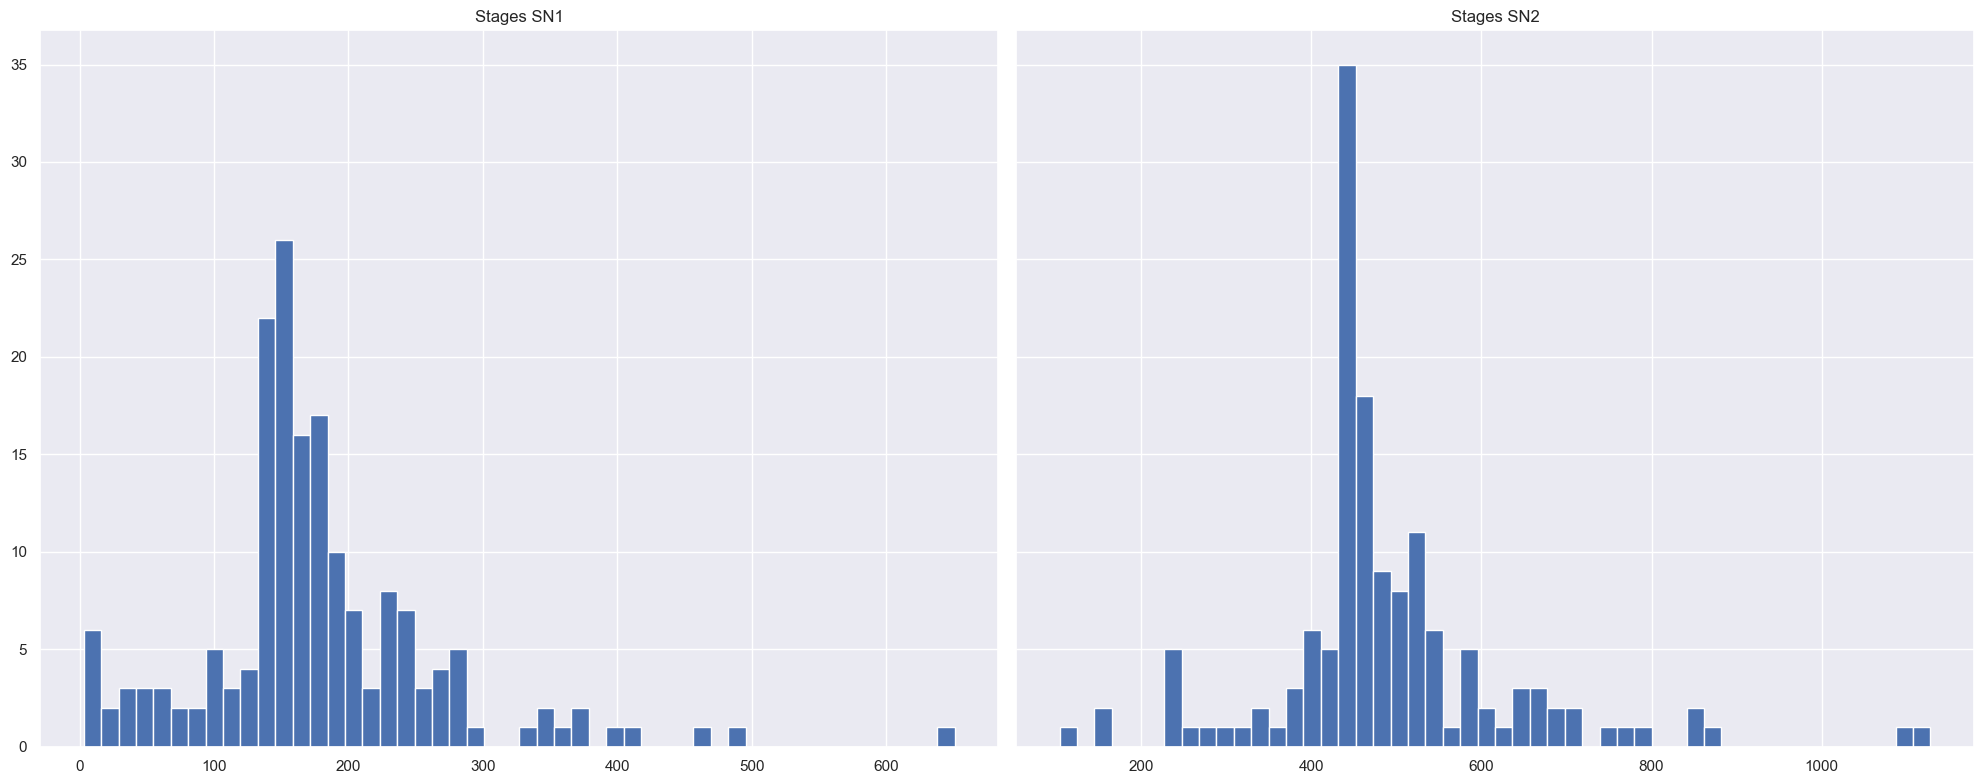

In [815]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(data_internship_sn1['All'], bins=50)
axs[1].hist(data_internship_sn2['All'], bins=50)

axs[0].set_title('Stages SN1')
axs[1].set_title('Stages SN2')

plt.show()

### Distribution des familles de situation en fonction du type de stage

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
name,,,,,,,,,,,
Pôle enfant,248,642,440,2504,73,36,70,82,158,144,218
Pôle femme,426,506,374,296,2474,243,85,60,129,56,107
SFE,96,128,112,1011,956,78,21,15,44,19,44
SN1,6503,8376,4807,4375,1231,497,1199,745,1472,816,576
SN2,13686,17518,10902,10679,2817,1685,3425,2401,3464,1527,1827
All,20959,27170,16635,18865,7551,2539,4800,3303,5267,2562,2772


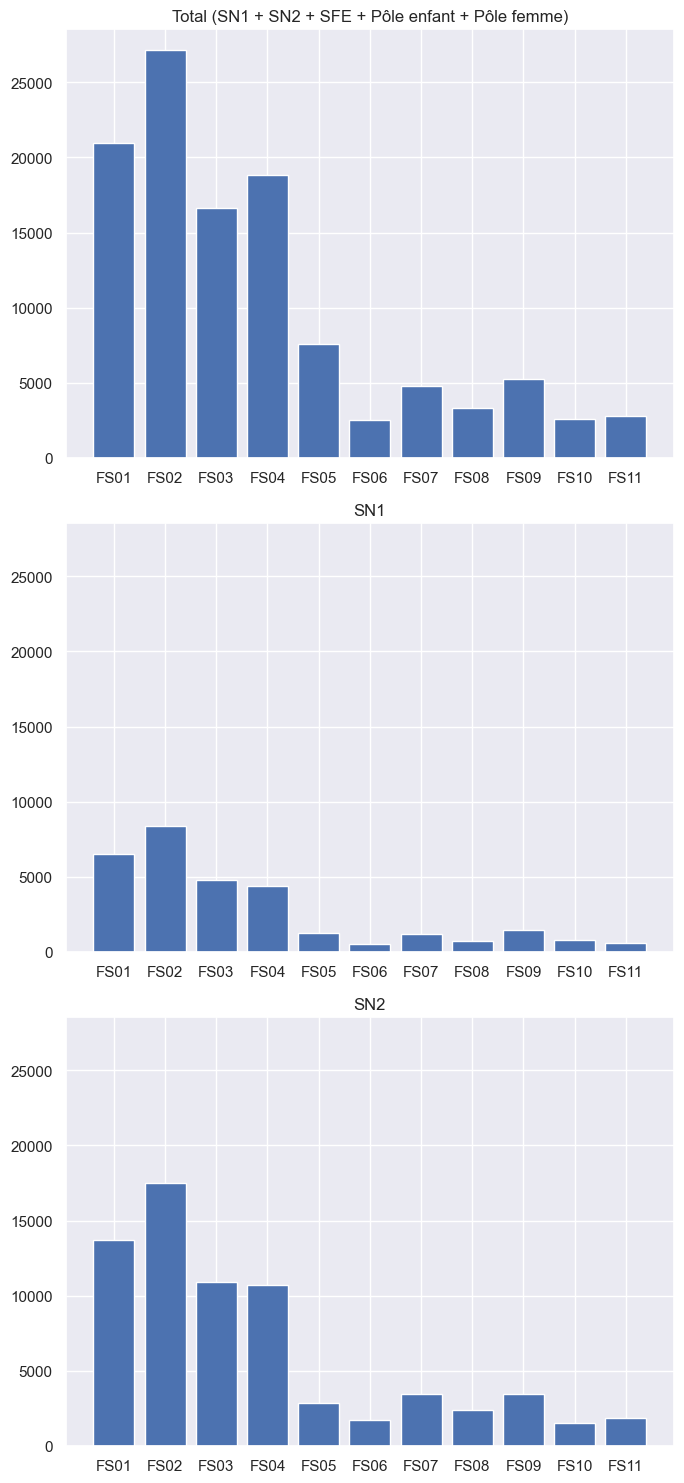

In [816]:
### Familles de situation : stages SN1 et SN2. 

data_type = pd.crosstab(data['name'], data['code'], margins=True)
data_type = data_type.drop(labels="All", axis=1)

display(data_type)

# plt.figure()
# plt.title("Distribution des familles de situation")
# plt.bar(height=data_type.iloc[4], x=data_type.columns)

fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True)

axs[0].bar(height=data_type.iloc[5], x=data_type.columns)
axs[1].bar(height=data_type.iloc[3], x=data_type.columns)
axs[2].bar(height=data_type.iloc[4], x=data_type.columns)

axs[0].set_title('Total (SN1 + SN2 + SFE + Pôle enfant + Pôle femme)')
axs[1].set_title('SN1')
axs[2].set_title('SN2')

fig.set_figwidth(7)
fig.set_figheight(15)

plt.show()

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
name,,,,,,,,,,,
Pôle enfant,248,642,440,2504,73,36,70,82,158,144,218
Pôle femme,426,506,374,296,2474,243,85,60,129,56,107
SFE,96,128,112,1011,956,78,21,15,44,19,44
SN1,6503,8376,4807,4375,1231,497,1199,745,1472,816,576
SN2,13686,17518,10902,10679,2817,1685,3425,2401,3464,1527,1827
All,20959,27170,16635,18865,7551,2539,4800,3303,5267,2562,2772


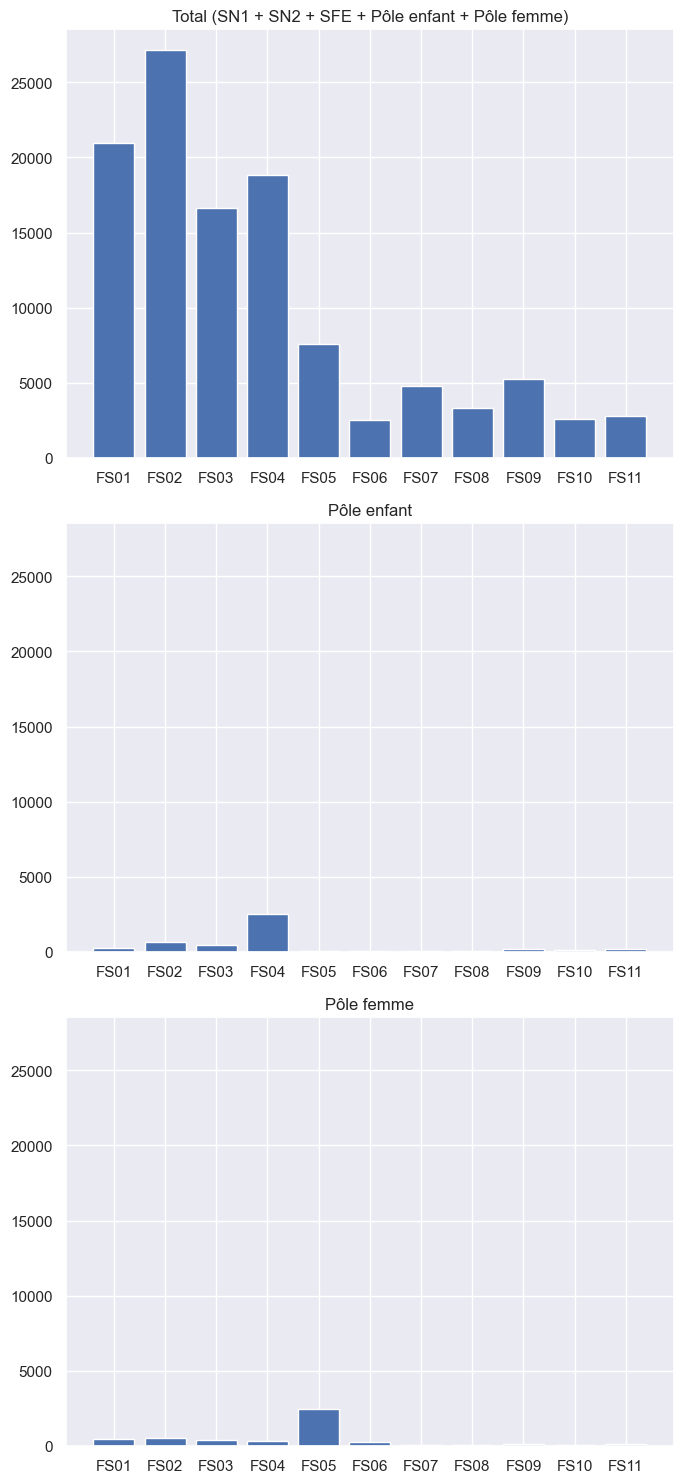

In [817]:
### Familles de situation : stages Santé de l'Enfant et Santé de la Femme. 

display(data_type)

fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True)

axs[0].bar(height=data_type.iloc[5], x=data_type.columns)
axs[1].bar(height=data_type.iloc[0], x=data_type.columns)
axs[2].bar(height=data_type.iloc[1], x=data_type.columns)

axs[0].set_title('Total (SN1 + SN2 + SFE + Pôle enfant + Pôle femme)')
axs[1].set_title('Pôle enfant')
axs[2].set_title('Pôle femme')

fig.set_figwidth(7)
fig.set_figheight(15)

plt.show()

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
name,,,,,,,,,,,
Pôle enfant,0.053738,0.139112,0.095341,0.542579,0.015818,0.007801,0.015168,0.017768,0.034236,0.031203,0.047237
Pôle femme,0.089571,0.106392,0.078638,0.062237,0.520185,0.051093,0.017872,0.012616,0.027124,0.011775,0.022498
SFE,0.038035,0.050713,0.044374,0.400555,0.378764,0.030903,0.008320,0.005943,0.017433,0.007528,0.017433
SN1,0.212537,0.273752,0.157107,0.142988,0.040233,0.016243,0.039187,0.024349,0.048109,0.026669,0.018825
SN2,0.195707,0.250504,0.155897,0.152708,0.040283,0.024095,0.048977,0.034334,0.049535,0.021836,0.026126


code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
name,,,,,,,,,,,
Pôle enfant,5.37,13.91,9.53,54.26,1.58,0.78,1.52,1.78,3.42,3.12,4.72
Pôle femme,8.96,10.64,7.86,6.22,52.02,5.11,1.79,1.26,2.71,1.18,2.25
SFE,3.80,5.07,4.44,40.06,37.88,3.09,0.83,0.59,1.74,0.75,1.74
SN1,21.25,27.38,15.71,14.30,4.02,1.62,3.92,2.43,4.81,2.67,1.88
SN2,19.57,25.05,15.59,15.27,4.03,2.41,4.90,3.43,4.95,2.18,2.61


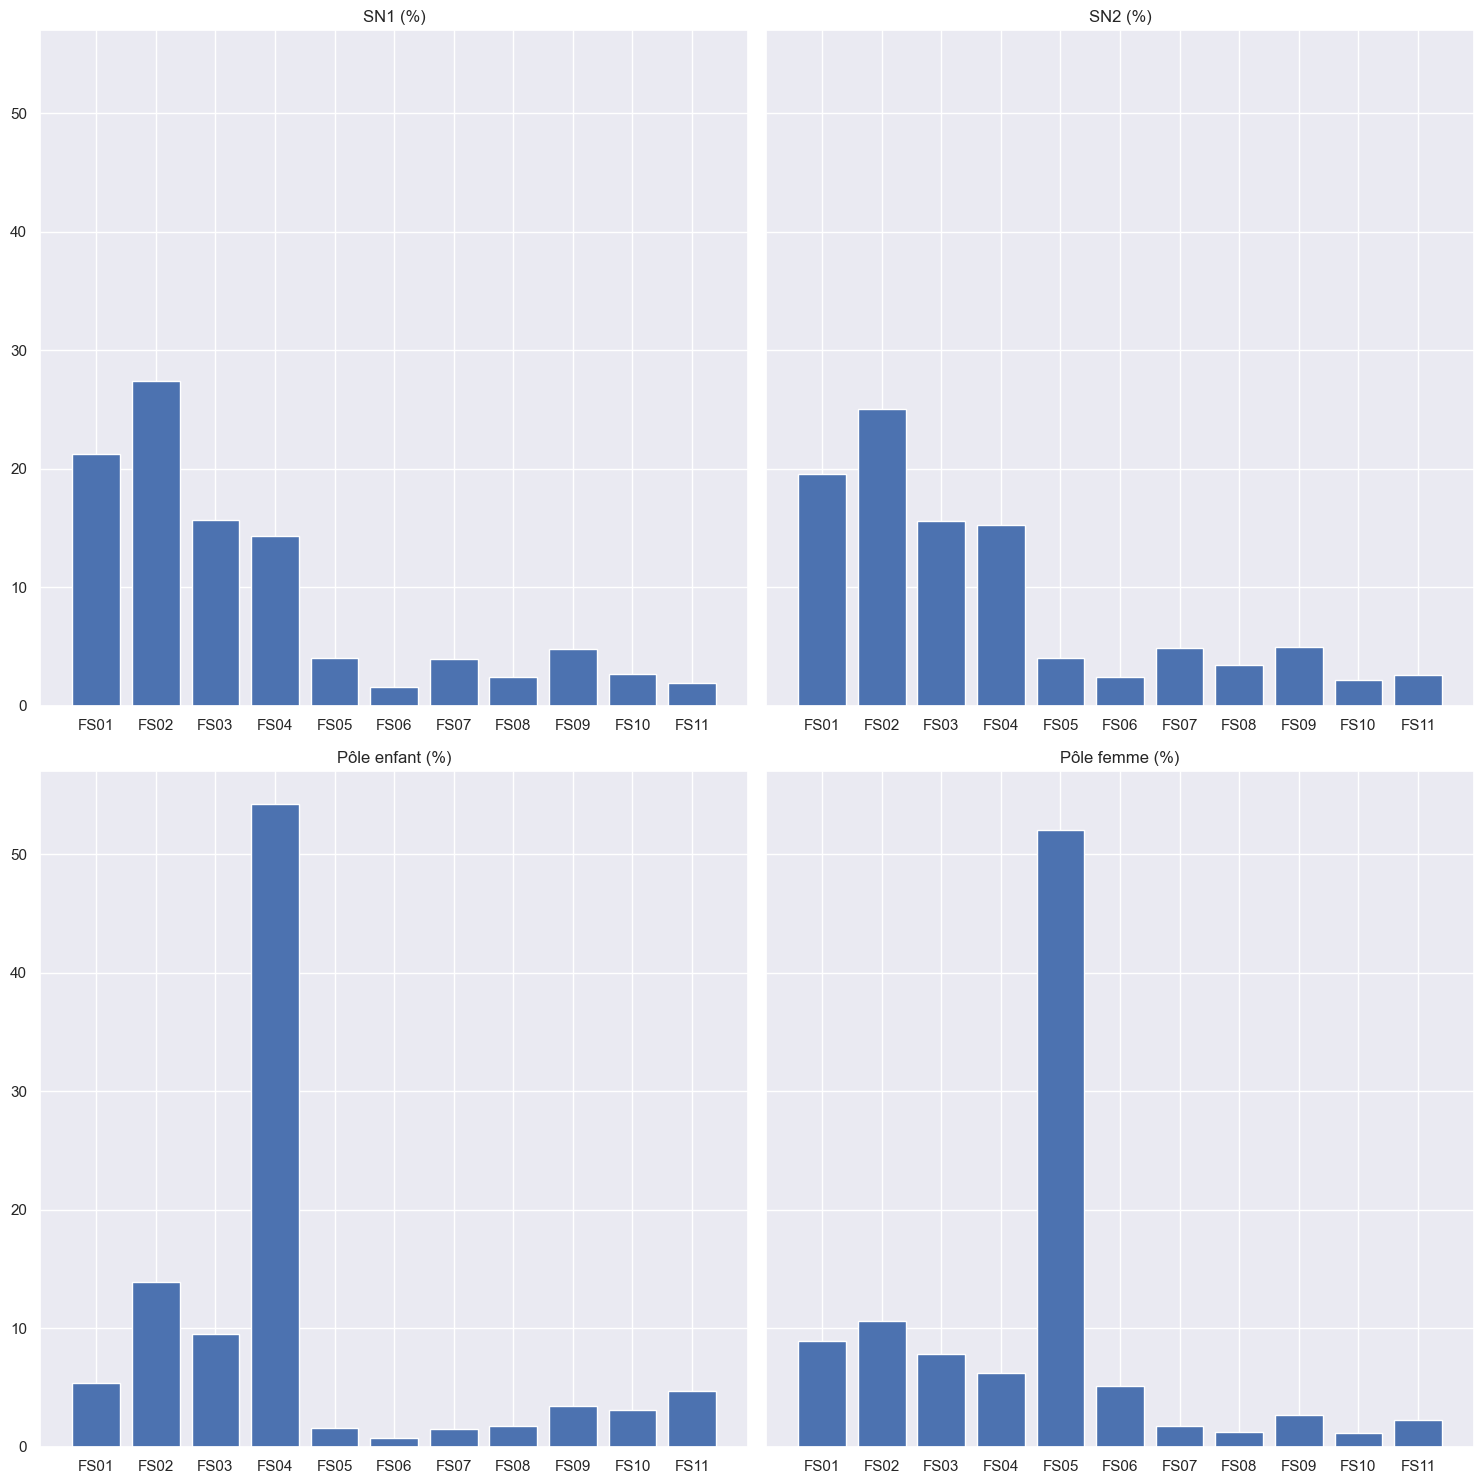

In [818]:
### Familles de situation (fréquence) : SN1 et SN2. 

data_type_freq = pd.crosstab(data['name'], data['code'], normalize='index')

display(data_type_freq)

data_type_percentage = round(data_type_freq*100,2)

display(data_type_percentage)

# # plt.figure()
# # plt.title("Distribution des familles de situation")
# # plt.bar(height=data_type.iloc[4], x=data_type.columns)

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0, 0].bar(height=data_type_percentage.iloc[3], x=data_type.columns)
axs[0, 1].bar(height=data_type_percentage.iloc[4], x=data_type.columns)
axs[1, 0].bar(height=data_type_percentage.iloc[0], x=data_type.columns)
axs[1, 1].bar(height=data_type_percentage.iloc[1], x=data_type.columns)

axs[0, 0].set_title('SN1 (%)')
axs[0,1].set_title('SN2 (%)')
axs[1,0].set_title('Pôle enfant (%)')
axs[1,1].set_title('Pôle femme (%)')

fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

In [819]:
data_mg = data.loc[(data['name'] == 'SN2') | (data['name'] == 'SN1'), :]
data_mg_contingency = pd.crosstab(data_mg['name'], data_mg['code'])
display(data_mg)

khi2, pval, ddl, contingent_theorique = chi2_contingency(data_mg_contingency)
display(pval)
display(khi2)
display(ddl)
display(contingent_theorique)

,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:08:04,2023-05-02 23:08:04,26,homme,directe,FS11,SN1,summer,tuesday,1,0
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:10:42,2023-05-02 23:10:42,27,femme,directe,FS08,SN1,summer,tuesday,1,0
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:22:54,2023-05-02 23:22:54,26,femme,directe,FS02,SN1,summer,tuesday,1,0
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:24:02,2023-05-02 23:24:02,50,homme,directe,FS01,SN1,summer,tuesday,1,0
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:25:16,2023-05-02 23:25:16,60,femme,directe,FS01,SN1,summer,tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116182,35808,01961a62-753a-70da-a1e6-e688d1ea7d52,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:49:42,2025-04-09 13:49:42,52,femme,indirecte,FS07,SN2,winter,tuesday,67,92
116184,35810,01961a63-7351-7421-9dd0-bed6ac35c47a,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-22,2025-04-09 13:50:47,2025-04-09 13:50:47,2,femme,indirecte,FS04,SN2,winter,wednesday,82,77
116186,35812,01961a64-59e0-7736-af45-e0e1d95ac7c7,019386bc-37c6-77b5-bd26-9df00b49a0e7,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-08,2025-04-09 13:51:46,2025-04-09 13:51:46,4,femme,indirecte,FS04,SN2,winter,wednesday,68,91
116187,35813,01961a65-09e4-7119-bd33-593dca00fb38,019386bc-9f53-7231-9127-4682de2064f5,019386bd-6e61-7f2c-aa54-c18151687c37,20241,1ed8105d-c26f-6bd6-96a3-91b15023c51a,2025-01-07,2025-04-09 13:52:31,2025-04-09 13:52:31,37,femme,indirecte,FS11,SN2,winter,tuesday,67,92


5.196875442349964e-65

330.5944912548581

10

array([[ 6144.78387116,  7881.17457823,  4781.23779445,  4581.88005332,
         1232.06127646,   664.11998647,  1407.37434347,   957.52588334,
         1502.33558809,   713.1224236 ,   731.38420142],
       [14044.21612884, 18012.82542177, 10927.76220555, 10472.11994668,
         2815.93872354,  1517.88001353,  3216.62565653,  2188.47411666,
         3433.66441191,  1629.8775764 ,  1671.61579858]])

In [820]:
data_mg_freq = pd.crosstab(data_mg['code'], data_mg['name'], normalize='columns')
display(data_mg_freq)

name,SN1,SN2
code,,
FS01,0.212537,0.195707
FS02,0.273752,0.250504
FS03,0.157107,0.155897
FS04,0.142988,0.152708
FS05,0.040233,0.040283
FS06,0.016243,0.024095
FS07,0.039187,0.048977
FS08,0.024349,0.034334
FS09,0.048109,0.049535


### Analyse en fonction du semestre (été vs hiver)

In [821]:
data_period = pd.crosstab(data['season'], data_mg['code'])

display(data_period)

khi2, pval, ddl, contingent_theorique = chi2_contingency(data_period)
display(pval)
display(khi2)
display(ddl)
display(contingent_theorique)

data_period_freq = pd.crosstab(data['code'], data['season'], normalize='columns')
display(data_period_freq)

code,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
season,,,,,,,,,,,
summer,9425,10176,6730,6486,1819,963,2044,1759,2044,976,946
winter,10764,15718,8979,8568,2229,1219,2580,1387,2892,1367,1457


6.093406468004458e-101

499.3450375972456

10

array([[ 8709.57894318, 11170.72847366,  6776.89710329,  6494.32866465,
         1746.31609104,   941.31959255,  1994.80375617,  1357.19130988,
         2129.40124145,  1010.77534617,  1036.65947796],
       [11479.42105682, 14723.27152634,  8932.10289671,  8559.67133535,
         2301.68390896,  1240.68040745,  2629.19624383,  1788.80869012,
         2806.59875855,  1332.22465383,  1366.34052204]])

season,summer,winter
code,,
FS01,0.199513,0.176221
FS02,0.219584,0.258916
FS03,0.145145,0.150171
FS04,0.169538,0.166450
FS05,0.073141,0.062504
FS06,0.022750,0.022455
FS07,0.043247,0.042266
FS08,0.037321,0.023184
FS09,0.045155,0.048173


Notes avant mise à jour des données : 
Le test du chi2 suggère une différence significative entre les semestre d'hiver et d'été.  
On observe une augmentation du nombre de consultations aigues (FS02, FS03) et une diminution des consultations de suivi chronique (FS01) en hiver. 

### Evolution du mode de supervision en fonction du temps écoulé depuis le début du stage. 

In [822]:
display(data.head())
test = pd.pivot_table(data, values='id', index=data['days'], columns=data['consultation_supervision'], aggfunc='count', fill_value=0)

display(test)

,index,id,supervisor,internship,period,student_id,consultation_date,creation_date,edition_date,patient_age,patient_gender,consultation_supervision,code,name,season,consultation_day,days,delay
0,0,1ede92d6-deee-63e6-b494-1bb47081ed3e,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:08:04,2023-05-02 23:08:04,26,homme,directe,FS11,SN1,summer,tuesday,1,0
1,1,1ede92dc-c048-679c-b00d-e396118e540f,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:10:42,2023-05-02 23:10:42,27,femme,directe,FS08,SN1,summer,tuesday,1,0
2,2,1ede92f8-0481-6f38-a1aa-f194f8ea44eb,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:22:54,2023-05-02 23:22:54,26,femme,directe,FS02,SN1,summer,tuesday,1,0
3,3,1ede92fa-8d75-6608-a104-b3ee6540a689,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:24:02,2023-05-02 23:24:02,50,homme,directe,FS01,SN1,summer,tuesday,1,0
4,4,1ede92fd-5369-65ba-b88d-41d9ce34d5e8,1ed8105d-c139-68c0-8546-91b15023c51a,1eddd31c-f272-6ff4-acef-fbdf5621217d,20222,1ed8105d-c25f-6a88-a941-91b15023c51a,2023-05-02,2023-05-02 23:25:16,2023-05-02 23:25:16,60,femme,directe,FS01,SN1,summer,tuesday,1,0


consultation_supervision,directe,indirecte
days,,
1,224,104
2,65,37
3,45,36
4,285,216
5,206,264
...,...,...
179,11,207
180,14,160
181,0,11


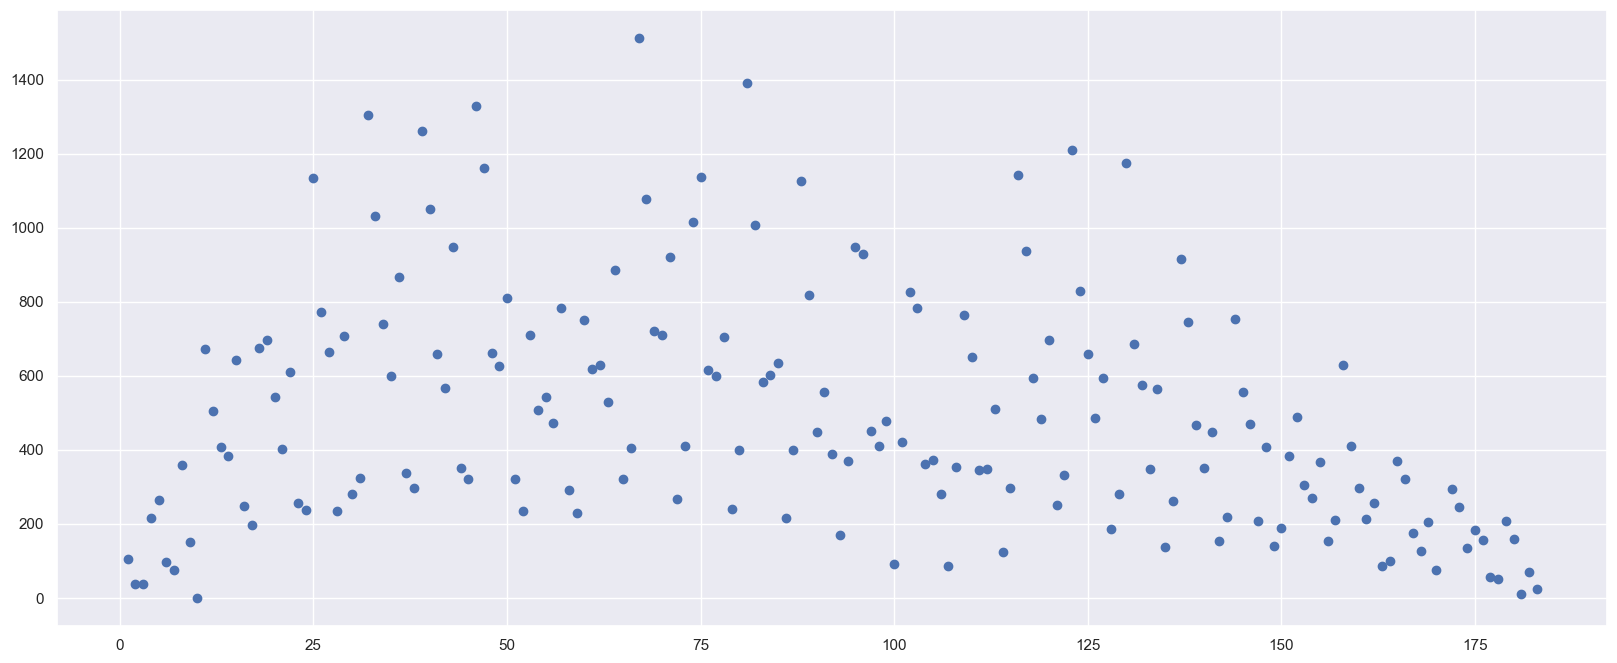

In [823]:
plt.scatter(x=test.index, y=test['indirecte'])
plt.show()

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183],
      dtype='int64', name='days', length=182)

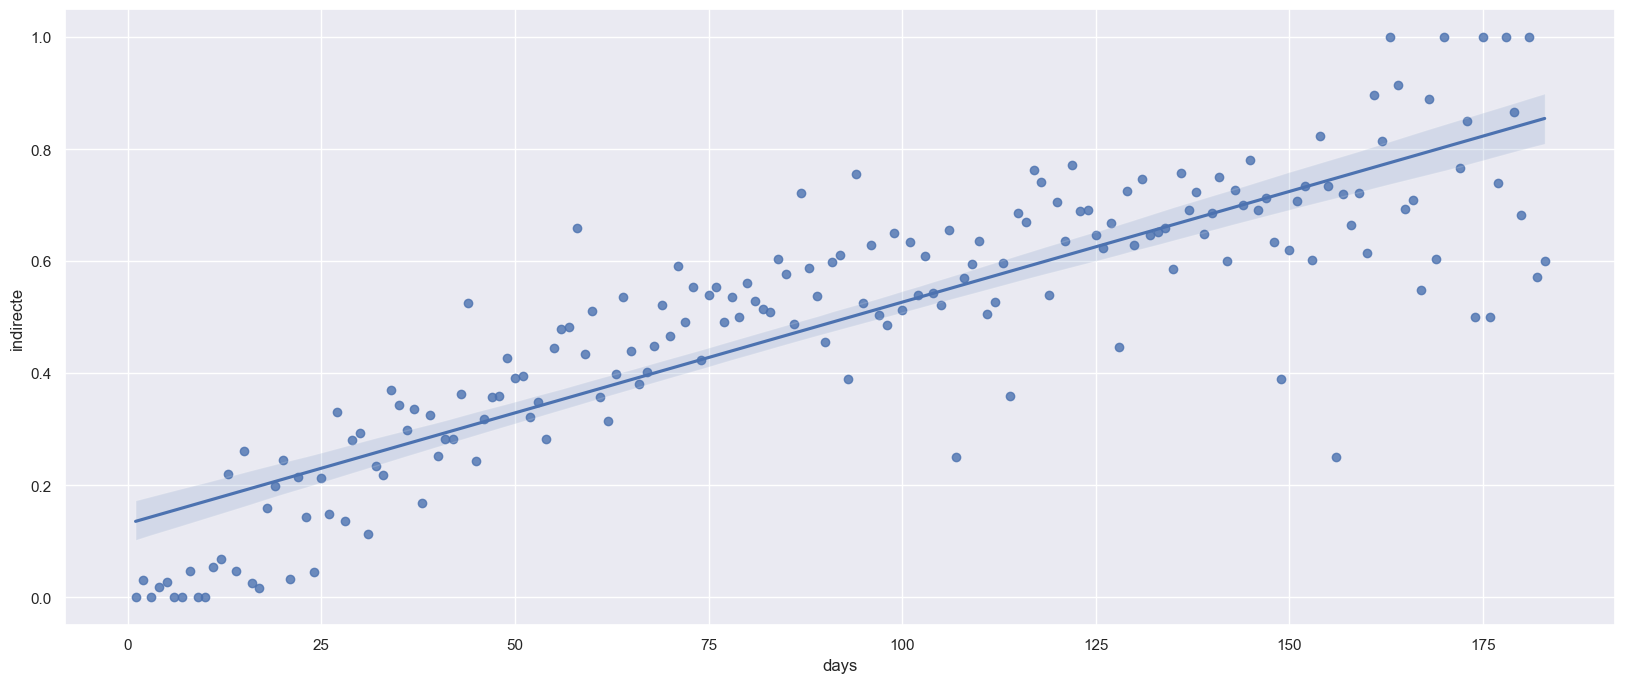

In [824]:
# Ce bloc et le suivant utilisent la proportion de supervision indirecte parmi le total des consultations du RAQ pour un temps donné. 
# Une valeur de 50 % sur 2 consultations aura donc autant de poids qu'une valeur de 10 % sur 100 consultations un jour donné... 

test_sn1 = pd.crosstab(data_sn1['days'], data_sn1['consultation_supervision'], normalize="index")

display(test_sn1.index)

# plt.scatter(x=test_sn1.index, y=test_sn1['indirecte'])
# plt.show()

sns.regplot(x=test_sn1.index, y=test_sn1['indirecte'])

test_sn1.to_clipboard()

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  11,
       ...
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183],
      dtype='int64', name='days', length=181)

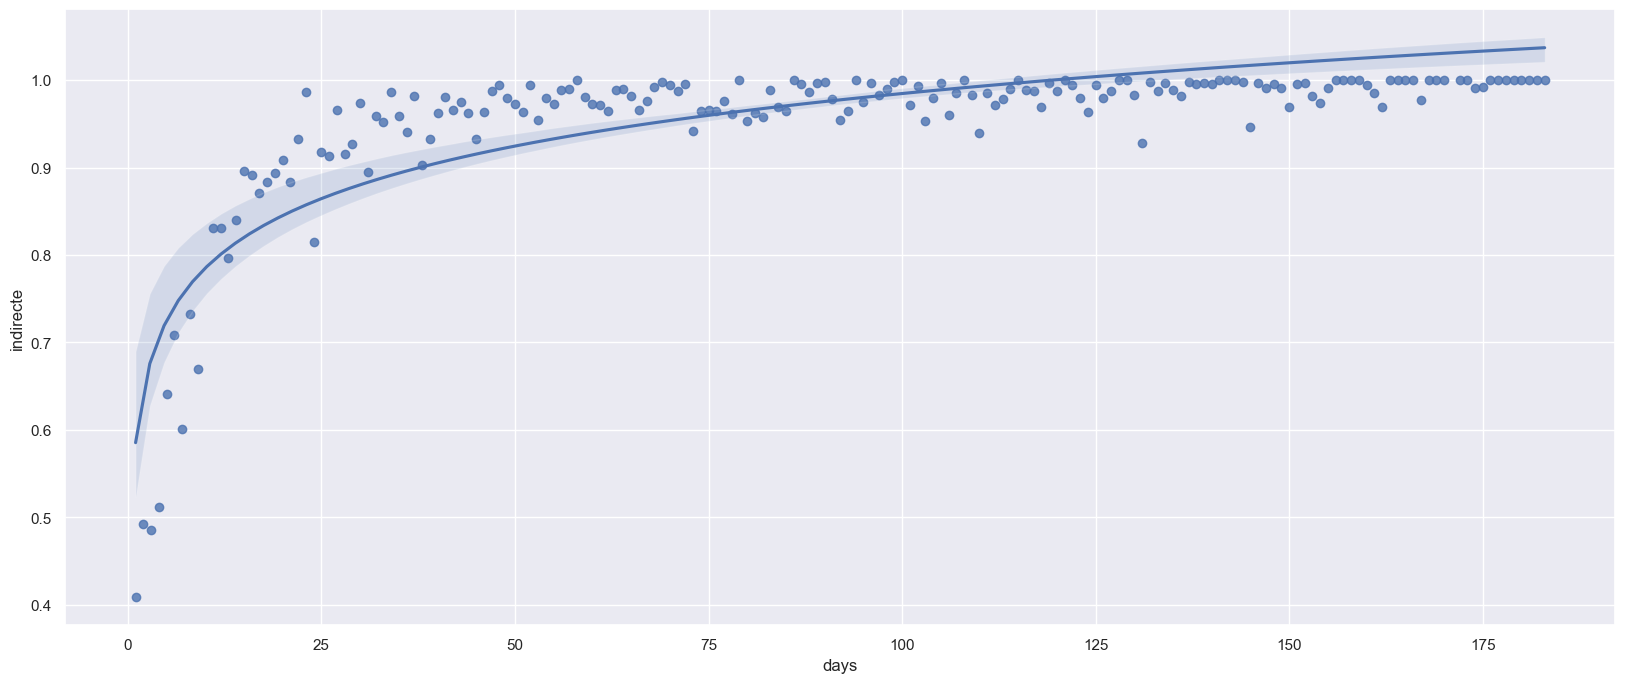

In [825]:
test_sn2 = pd.crosstab(data_sn2['days'], data_sn2['consultation_supervision'], normalize="index")

display(test_sn2.index)

# plt.scatter(x=test_sn2.index, y=test_sn2['indirecte'])
# plt.show()

sns.regplot(x=test_sn2.index, y=test_sn2['indirecte'], logx=True)

test_sn2.to_clipboard()

In [826]:
result = pd.to_datetime('2023-09-05') - pd.to_datetime('2023-05-02')
result

Timedelta('126 days 00:00:00')